In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 128
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 128
output_dim = 512
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=512,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=300,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
# optimiser_3 = optim.AdamW(model`_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    [model_1, optimiser_1, "DropLinear"],
    # [model_2, optimiser_2, "Linear"],
    # [model_3, optimiser_3, "ViT"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

: 

Creating models for FASHION-MNIST dataset...


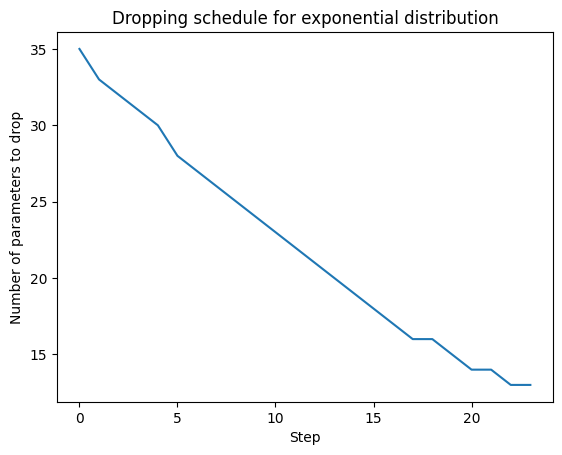

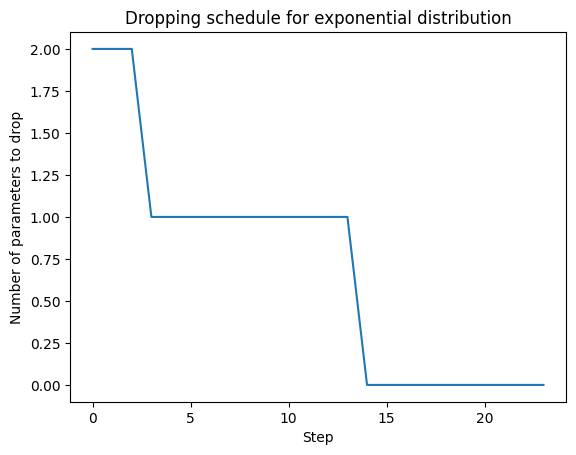

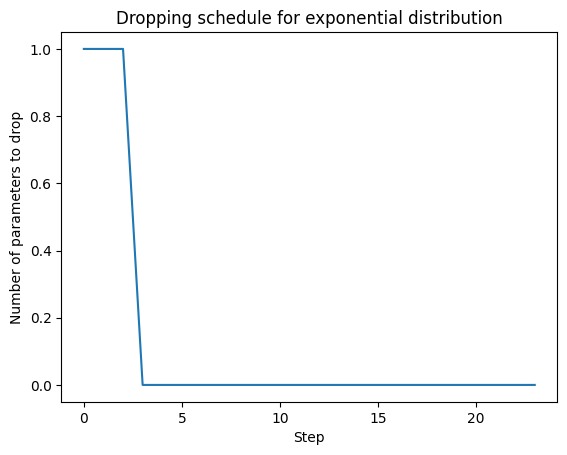

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
DropLinear: 26,506 parameters
------------------------------------------------------------

Training DropLinear model...


Training DropLinear:   7%|▋         | 234/3525 [00:01<00:15, 210.19it/s, Epoch=1/15, Batch=235/235, Loss=0.3455]

Epoch 1/15: Train Loss: 0.7119, Train Acc: 0.7499, Test Loss: 0.4884, Test Acc: 0.8301


Training DropLinear:  13%|█▎        | 469/3525 [00:02<00:15, 200.75it/s, Epoch=2/15, Batch=235/235, Loss=0.2656]

Epoch 2/15: Train Loss: 0.4637, Train Acc: 0.8357, Test Loss: 0.4502, Test Acc: 0.8415


Training DropLinear:  20%|█▉        | 704/3525 [00:04<00:14, 198.60it/s, Epoch=3/15, Batch=235/235, Loss=0.3704]

Epoch 3/15: Train Loss: 0.4041, Train Acc: 0.8541, Test Loss: 0.4245, Test Acc: 0.8490


Training DropLinear:  27%|██▋       | 939/3525 [00:06<00:12, 202.04it/s, Epoch=4/15, Batch=235/235, Loss=0.4459]

Epoch 4/15: Train Loss: 0.3956, Train Acc: 0.8576, Test Loss: 0.4132, Test Acc: 0.8530


Training DropLinear:  33%|███▎      | 1174/3525 [00:07<00:11, 210.25it/s, Epoch=5/15, Batch=235/235, Loss=0.4290]

Epoch 5/15: Train Loss: 0.3786, Train Acc: 0.8640, Test Loss: 0.4180, Test Acc: 0.8474


Training DropLinear:  36%|███▌      | 1269/3525 [00:08<00:15, 147.01it/s, Epoch=6/15, Batch=95/235, Loss=0.3712] 


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 128
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 128
output_dim = 512
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=512,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=300,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
# optimiser_3 = optim.AdamW(model`_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    [model_1, optimiser_1, "DropLinear"],
    # [model_2, optimiser_2, "Linear"],
    # [model_3, optimiser_3, "ViT"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Creating models for FASHION-MNIST dataset...


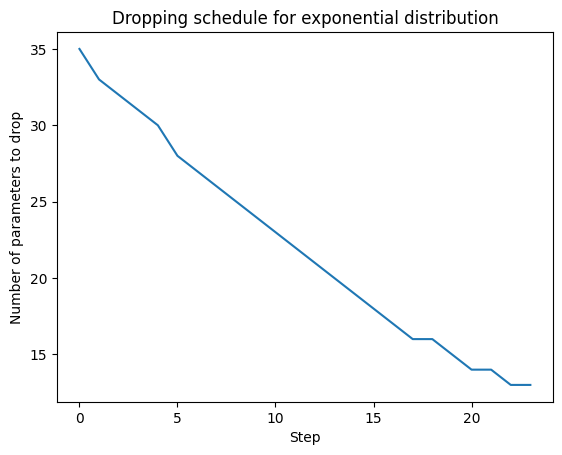

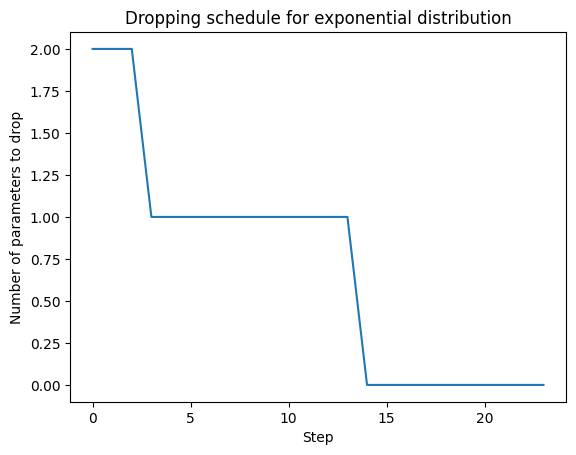

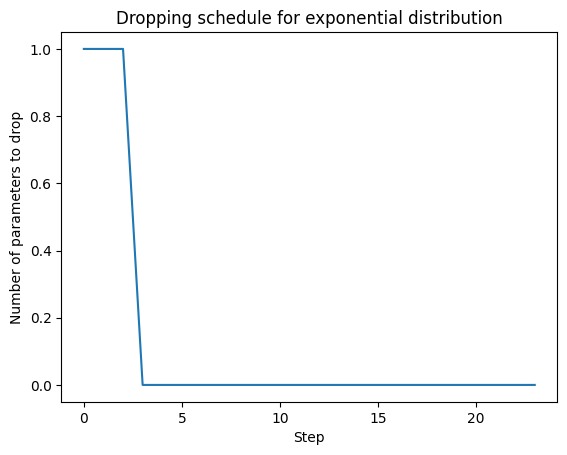

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
DropLinear: 26,506 parameters
------------------------------------------------------------

Training DropLinear model...


Training DropLinear:   7%|▋         | 234/3525 [00:01<00:16, 205.53it/s, Epoch=1/15, Batch=235/235, Loss=0.3455]

Epoch 1/15: Train Loss: 0.7119, Train Acc: 0.7499, Test Loss: 0.4884, Test Acc: 0.8301


Training DropLinear:  13%|█▎        | 469/3525 [00:02<00:14, 207.71it/s, Epoch=2/15, Batch=235/235, Loss=0.2656]

Epoch 2/15: Train Loss: 0.4637, Train Acc: 0.8357, Test Loss: 0.4502, Test Acc: 0.8415


Training DropLinear:  20%|█▉        | 704/3525 [00:04<00:13, 205.21it/s, Epoch=3/15, Batch=235/235, Loss=0.3704]

Epoch 3/15: Train Loss: 0.4041, Train Acc: 0.8541, Test Loss: 0.4245, Test Acc: 0.8490


Training DropLinear:  27%|██▋       | 939/3525 [00:05<00:12, 206.18it/s, Epoch=4/15, Batch=235/235, Loss=0.4459]

Epoch 4/15: Train Loss: 0.3956, Train Acc: 0.8576, Test Loss: 0.4132, Test Acc: 0.8530


Training DropLinear:  33%|███▎      | 1174/3525 [00:07<00:11, 200.83it/s, Epoch=5/15, Batch=235/235, Loss=0.4290]

Epoch 5/15: Train Loss: 0.3786, Train Acc: 0.8640, Test Loss: 0.4180, Test Acc: 0.8474


Training DropLinear:  40%|███▉      | 1409/3525 [00:09<00:10, 206.47it/s, Epoch=6/15, Batch=235/235, Loss=0.4041]

Epoch 6/15: Train Loss: 0.3784, Train Acc: 0.8647, Test Loss: 0.4079, Test Acc: 0.8472


Training DropLinear:  47%|████▋     | 1644/3525 [00:10<00:09, 202.73it/s, Epoch=7/15, Batch=235/235, Loss=0.3859]

Epoch 7/15: Train Loss: 0.3835, Train Acc: 0.8619, Test Loss: 0.4006, Test Acc: 0.8548


Training DropLinear:  53%|█████▎    | 1879/3525 [00:12<00:07, 215.77it/s, Epoch=8/15, Batch=235/235, Loss=0.4217]

Epoch 8/15: Train Loss: 0.3852, Train Acc: 0.8613, Test Loss: 0.4120, Test Acc: 0.8500


Training DropLinear:  60%|█████▉    | 2114/3525 [00:13<00:07, 201.28it/s, Epoch=9/15, Batch=235/235, Loss=0.3664]

Epoch 9/15: Train Loss: 0.3672, Train Acc: 0.8677, Test Loss: 0.3933, Test Acc: 0.8556


Training DropLinear:  67%|██████▋   | 2349/3525 [00:15<00:06, 194.68it/s, Epoch=10/15, Batch=235/235, Loss=0.3362]

Epoch 10/15: Train Loss: 0.3605, Train Acc: 0.8703, Test Loss: 0.4014, Test Acc: 0.8539


Training DropLinear:  73%|███████▎  | 2584/3525 [00:17<00:04, 206.05it/s, Epoch=11/15, Batch=235/235, Loss=0.3439]

Epoch 11/15: Train Loss: 0.3569, Train Acc: 0.8711, Test Loss: 0.3937, Test Acc: 0.8573


Training DropLinear:  80%|███████▉  | 2819/3525 [00:18<00:03, 187.70it/s, Epoch=12/15, Batch=235/235, Loss=0.2850]

Epoch 12/15: Train Loss: 0.3537, Train Acc: 0.8718, Test Loss: 0.3917, Test Acc: 0.8579


Training DropLinear:  87%|████████▋ | 3054/3525 [00:20<00:02, 206.07it/s, Epoch=13/15, Batch=235/235, Loss=0.3326]

Epoch 13/15: Train Loss: 0.3507, Train Acc: 0.8714, Test Loss: 0.3830, Test Acc: 0.8615


Training DropLinear:  93%|█████████▎| 3289/3525 [00:21<00:01, 200.77it/s, Epoch=14/15, Batch=235/235, Loss=0.3148]

Epoch 14/15: Train Loss: 0.3429, Train Acc: 0.8741, Test Loss: 0.3845, Test Acc: 0.8604


Training DropLinear: 100%|██████████| 3525/3525 [00:23<00:00, 147.63it/s, Epoch=15/15, Batch=235/235, Loss=0.2688]

Epoch 15/15: Train Loss: 0.3374, Train Acc: 0.8769, Test Loss: 0.3803, Test Acc: 0.8605
DropLinear Results:
  Final Train Loss: 0.3374
  Final Train Accuracy: 87.7%
  Final Test Loss: 0.3803
  Final Test Accuracy: 86.1%

CREATING COMPARATIVE PLOTS


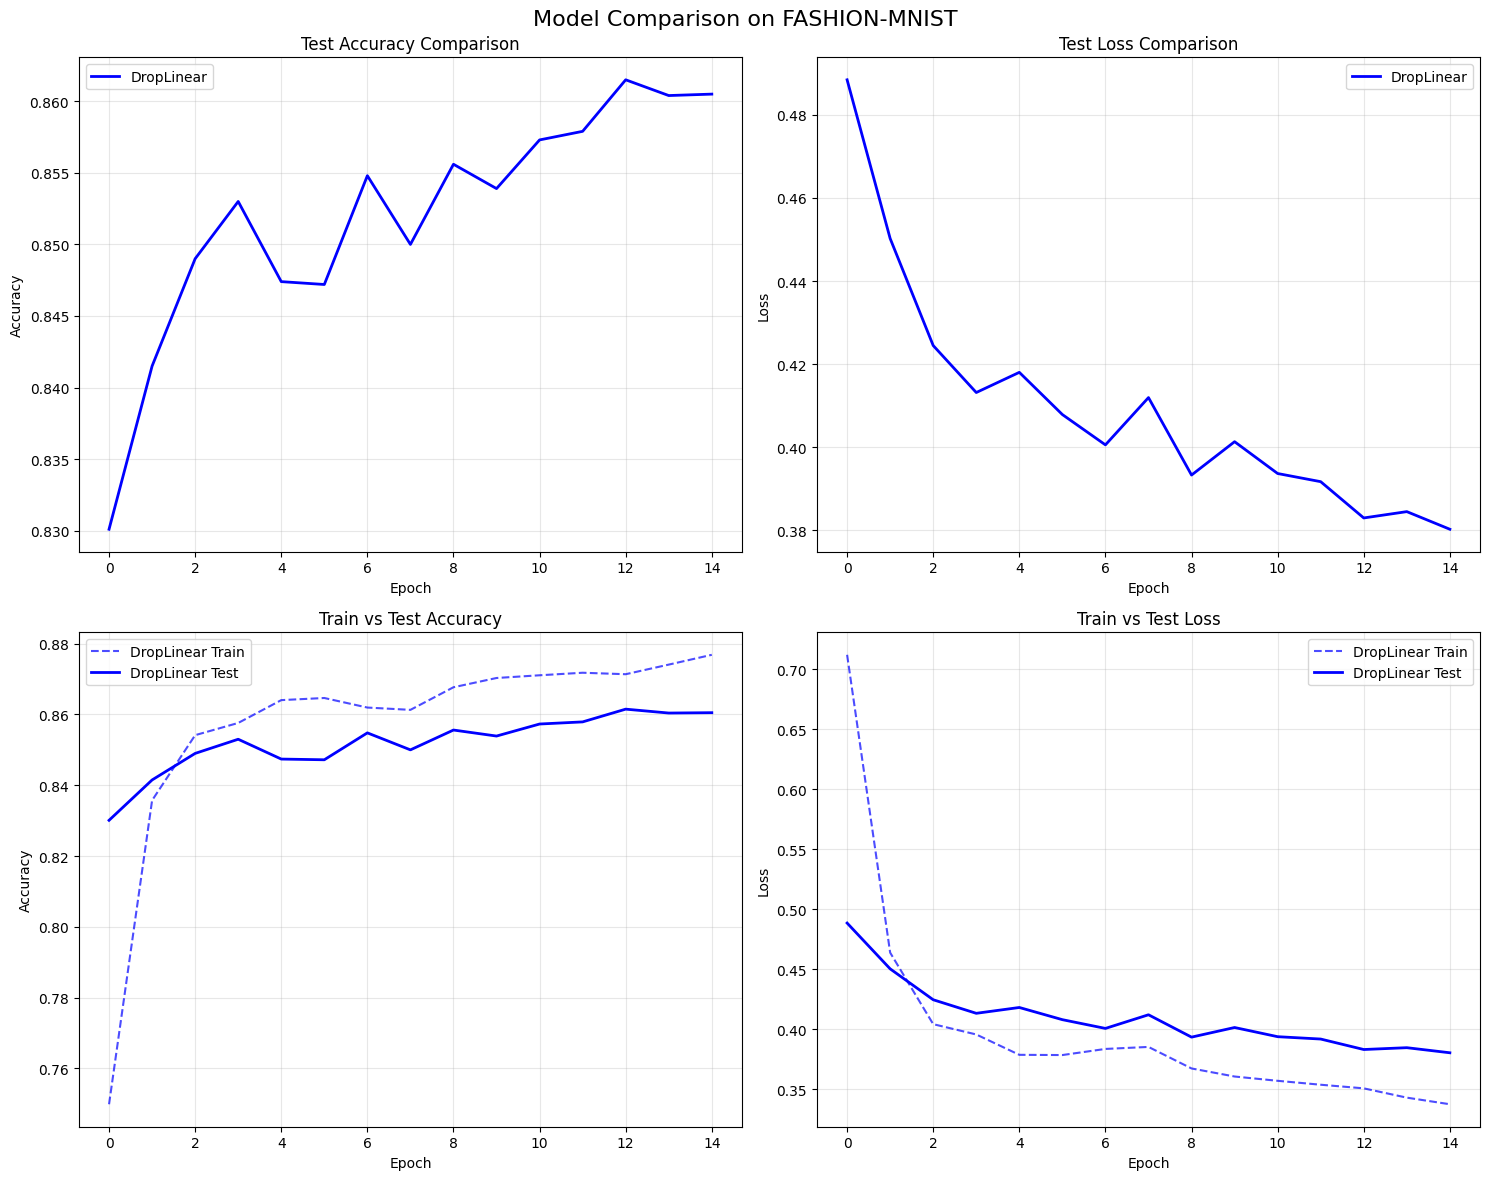


WEIGHT DISTRIBUTIONS (First Layer)


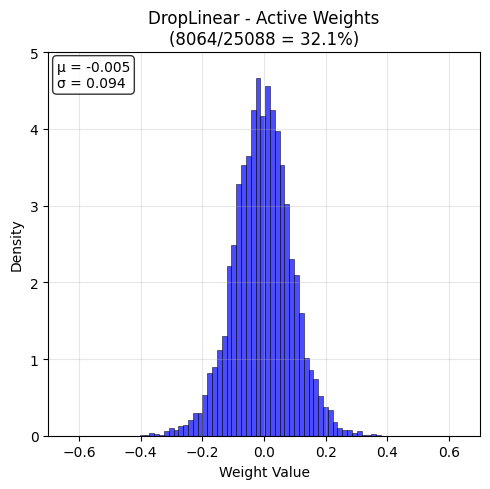


FINAL RESULTS COMPARISON
Model                Train Loss   Test Loss    Train Acc    Test Acc     Parameters  
--------------------------------------------------------------------------------
DropLinear           0.3374       0.3803       87.7       % 86.1       % 8,908       
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
DropLinear: 8,908 parameters
------------------------------------------------------------
tensor(8096, device='cuda:0')
25120


<Figure size 640x480 with 0 Axes>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 128
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 128
output_dim = 512
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=512,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=300,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
# optimiser_3 = optim.AdamW(model`_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    [model_1, optimiser_1, "DropLinear"],
    # [model_2, optimiser_2, "Linear"],
    # [model_3, optimiser_3, "ViT"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Creating models for FASHION-MNIST dataset...


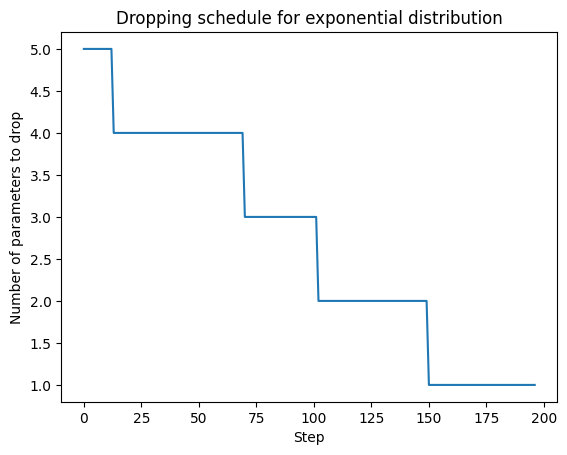

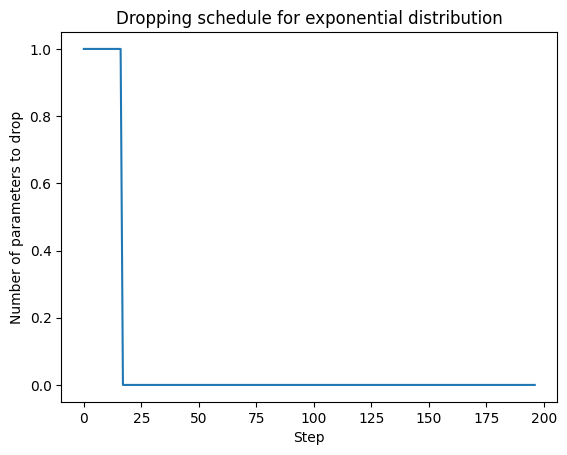

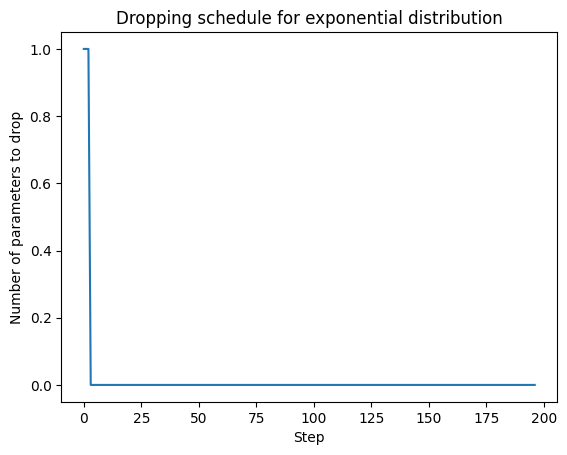

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
DropLinear: 26,506 parameters
------------------------------------------------------------

Training DropLinear model...


Training DropLinear:   7%|▋         | 1874/28125 [00:04<01:04, 406.84it/s, Epoch=1/15, Batch=1875/1875, Loss=0.2070]

Epoch 1/15: Train Loss: 0.5294, Train Acc: 0.8126, Test Loss: 0.4768, Test Acc: 0.8314


Training DropLinear:  13%|█▎        | 3749/28125 [00:09<00:59, 406.42it/s, Epoch=2/15, Batch=1875/1875, Loss=0.3670]

Epoch 2/15: Train Loss: 0.4284, Train Acc: 0.8460, Test Loss: 0.4228, Test Acc: 0.8472


Training DropLinear:  20%|█▉        | 5624/28125 [00:15<00:55, 405.28it/s, Epoch=3/15, Batch=1875/1875, Loss=0.4695]

Epoch 3/15: Train Loss: 0.3804, Train Acc: 0.8628, Test Loss: 0.4041, Test Acc: 0.8564


Training DropLinear:  27%|██▋       | 7499/28125 [00:20<00:50, 405.35it/s, Epoch=4/15, Batch=1875/1875, Loss=0.2360]

Epoch 4/15: Train Loss: 0.3618, Train Acc: 0.8687, Test Loss: 0.4013, Test Acc: 0.8567


Training DropLinear:  33%|███▎      | 9374/28125 [00:25<00:47, 395.65it/s, Epoch=5/15, Batch=1875/1875, Loss=0.3420]

Epoch 5/15: Train Loss: 0.3504, Train Acc: 0.8721, Test Loss: 0.4056, Test Acc: 0.8534


Training DropLinear:  40%|███▉      | 11249/28125 [00:30<00:41, 408.43it/s, Epoch=6/15, Batch=1875/1875, Loss=0.4464]

Epoch 6/15: Train Loss: 0.3424, Train Acc: 0.8754, Test Loss: 0.3915, Test Acc: 0.8606


Training DropLinear:  47%|████▋     | 13124/28125 [00:36<00:36, 411.04it/s, Epoch=7/15, Batch=1875/1875, Loss=0.3642]

Epoch 7/15: Train Loss: 0.3359, Train Acc: 0.8774, Test Loss: 0.3819, Test Acc: 0.8642


Training DropLinear:  53%|█████▎    | 14999/28125 [00:41<00:33, 392.02it/s, Epoch=8/15, Batch=1875/1875, Loss=0.3302]

Epoch 8/15: Train Loss: 0.3318, Train Acc: 0.8783, Test Loss: 0.3900, Test Acc: 0.8621


Training DropLinear:  60%|█████▉    | 16874/28125 [00:46<00:28, 396.38it/s, Epoch=9/15, Batch=1875/1875, Loss=0.3644]

Epoch 9/15: Train Loss: 0.3284, Train Acc: 0.8783, Test Loss: 0.3784, Test Acc: 0.8650


Training DropLinear:  67%|██████▋   | 18749/28125 [00:51<00:23, 400.18it/s, Epoch=10/15, Batch=1875/1875, Loss=0.3857]

Epoch 10/15: Train Loss: 0.3245, Train Acc: 0.8806, Test Loss: 0.3831, Test Acc: 0.8626


Training DropLinear:  73%|███████▎  | 20452/28125 [00:56<00:21, 360.90it/s, Epoch=11/15, Batch=1702/1875, Loss=0.2175]


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 32
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 128
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 128
output_dim = 512
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=512,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=300,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
# optimiser_3 = optim.AdamW(model`_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    [model_1, optimiser_1, "DropLinear"],
    # [model_2, optimiser_2, "Linear"],
    # [model_3, optimiser_3, "ViT"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Creating models for FASHION-MNIST dataset...


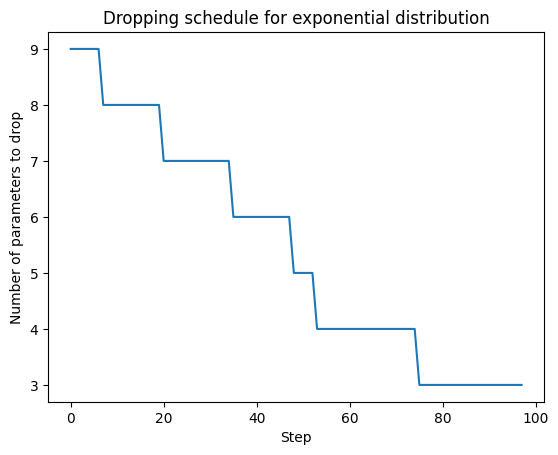

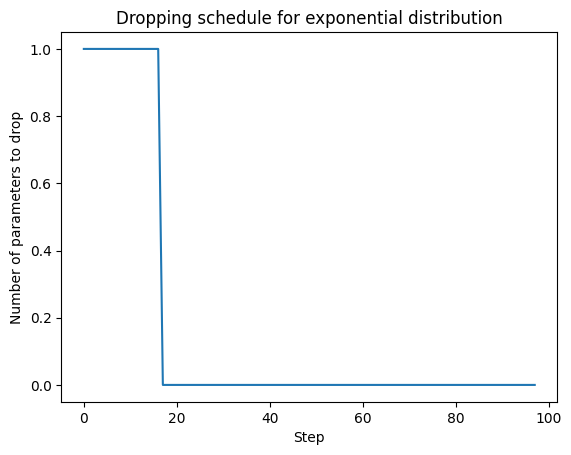

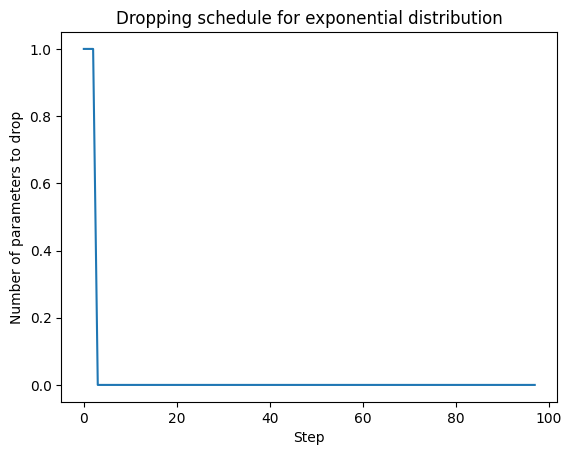

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
DropLinear: 26,506 parameters
------------------------------------------------------------

Training DropLinear model...


Training DropLinear:   7%|▋         | 234/3525 [00:01<00:15, 206.09it/s, Epoch=1/15, Batch=235/235, Loss=0.4827]

Epoch 1/15: Train Loss: 0.7502, Train Acc: 0.7380, Test Loss: 0.5907, Test Acc: 0.7976


Training DropLinear:  13%|█▎        | 469/3525 [00:02<00:15, 203.59it/s, Epoch=2/15, Batch=235/235, Loss=0.4309]

Epoch 2/15: Train Loss: 0.5030, Train Acc: 0.8199, Test Loss: 0.5541, Test Acc: 0.8017


Training DropLinear:  20%|█▉        | 704/3525 [00:04<00:13, 202.22it/s, Epoch=3/15, Batch=235/235, Loss=0.4234]

Epoch 3/15: Train Loss: 0.4642, Train Acc: 0.8352, Test Loss: 0.4437, Test Acc: 0.8423


Training DropLinear:  27%|██▋       | 939/3525 [00:06<00:12, 200.65it/s, Epoch=4/15, Batch=235/235, Loss=0.4378]

Epoch 4/15: Train Loss: 0.4058, Train Acc: 0.8551, Test Loss: 0.4245, Test Acc: 0.8464


Training DropLinear:  33%|███▎      | 1174/3525 [00:07<00:11, 212.11it/s, Epoch=5/15, Batch=235/235, Loss=0.4567]

Epoch 5/15: Train Loss: 0.3872, Train Acc: 0.8619, Test Loss: 0.4314, Test Acc: 0.8447


Training DropLinear:  40%|███▉      | 1409/3525 [00:09<00:10, 192.84it/s, Epoch=6/15, Batch=235/235, Loss=0.3975]

Epoch 6/15: Train Loss: 0.3763, Train Acc: 0.8645, Test Loss: 0.4124, Test Acc: 0.8474


Training DropLinear:  47%|████▋     | 1644/3525 [00:10<00:09, 200.24it/s, Epoch=7/15, Batch=235/235, Loss=0.4048]

Epoch 7/15: Train Loss: 0.3687, Train Acc: 0.8671, Test Loss: 0.4068, Test Acc: 0.8535


Training DropLinear:  53%|█████▎    | 1879/3525 [00:12<00:07, 208.14it/s, Epoch=8/15, Batch=235/235, Loss=0.4116]

Epoch 8/15: Train Loss: 0.3630, Train Acc: 0.8687, Test Loss: 0.4063, Test Acc: 0.8504


Training DropLinear:  60%|█████▉    | 2114/3525 [00:14<00:06, 205.85it/s, Epoch=9/15, Batch=235/235, Loss=0.3495]

Epoch 9/15: Train Loss: 0.3588, Train Acc: 0.8700, Test Loss: 0.3949, Test Acc: 0.8567


Training DropLinear:  67%|██████▋   | 2349/3525 [00:15<00:05, 203.48it/s, Epoch=10/15, Batch=235/235, Loss=0.3301]

Epoch 10/15: Train Loss: 0.3553, Train Acc: 0.8712, Test Loss: 0.4056, Test Acc: 0.8542


Training DropLinear:  73%|███████▎  | 2584/3525 [00:17<00:04, 195.14it/s, Epoch=11/15, Batch=235/235, Loss=0.3510]

Epoch 11/15: Train Loss: 0.3536, Train Acc: 0.8719, Test Loss: 0.3953, Test Acc: 0.8543


Training DropLinear:  80%|███████▉  | 2819/3525 [00:18<00:03, 206.15it/s, Epoch=12/15, Batch=235/235, Loss=0.2723]

Epoch 12/15: Train Loss: 0.3513, Train Acc: 0.8725, Test Loss: 0.3965, Test Acc: 0.8551


Training DropLinear:  87%|████████▋ | 3054/3525 [00:20<00:02, 205.85it/s, Epoch=13/15, Batch=235/235, Loss=0.3131]

Epoch 13/15: Train Loss: 0.3495, Train Acc: 0.8730, Test Loss: 0.3943, Test Acc: 0.8580


Training DropLinear:  93%|█████████▎| 3289/3525 [00:21<00:01, 201.63it/s, Epoch=14/15, Batch=235/235, Loss=0.2774]

Epoch 14/15: Train Loss: 0.3435, Train Acc: 0.8747, Test Loss: 0.3928, Test Acc: 0.8564


Training DropLinear: 100%|██████████| 3525/3525 [00:23<00:00, 147.43it/s, Epoch=15/15, Batch=235/235, Loss=0.2806]

Epoch 15/15: Train Loss: 0.3386, Train Acc: 0.8773, Test Loss: 0.3899, Test Acc: 0.8576
DropLinear Results:
  Final Train Loss: 0.3386
  Final Train Accuracy: 87.7%
  Final Test Loss: 0.3899
  Final Test Accuracy: 85.8%

CREATING COMPARATIVE PLOTS


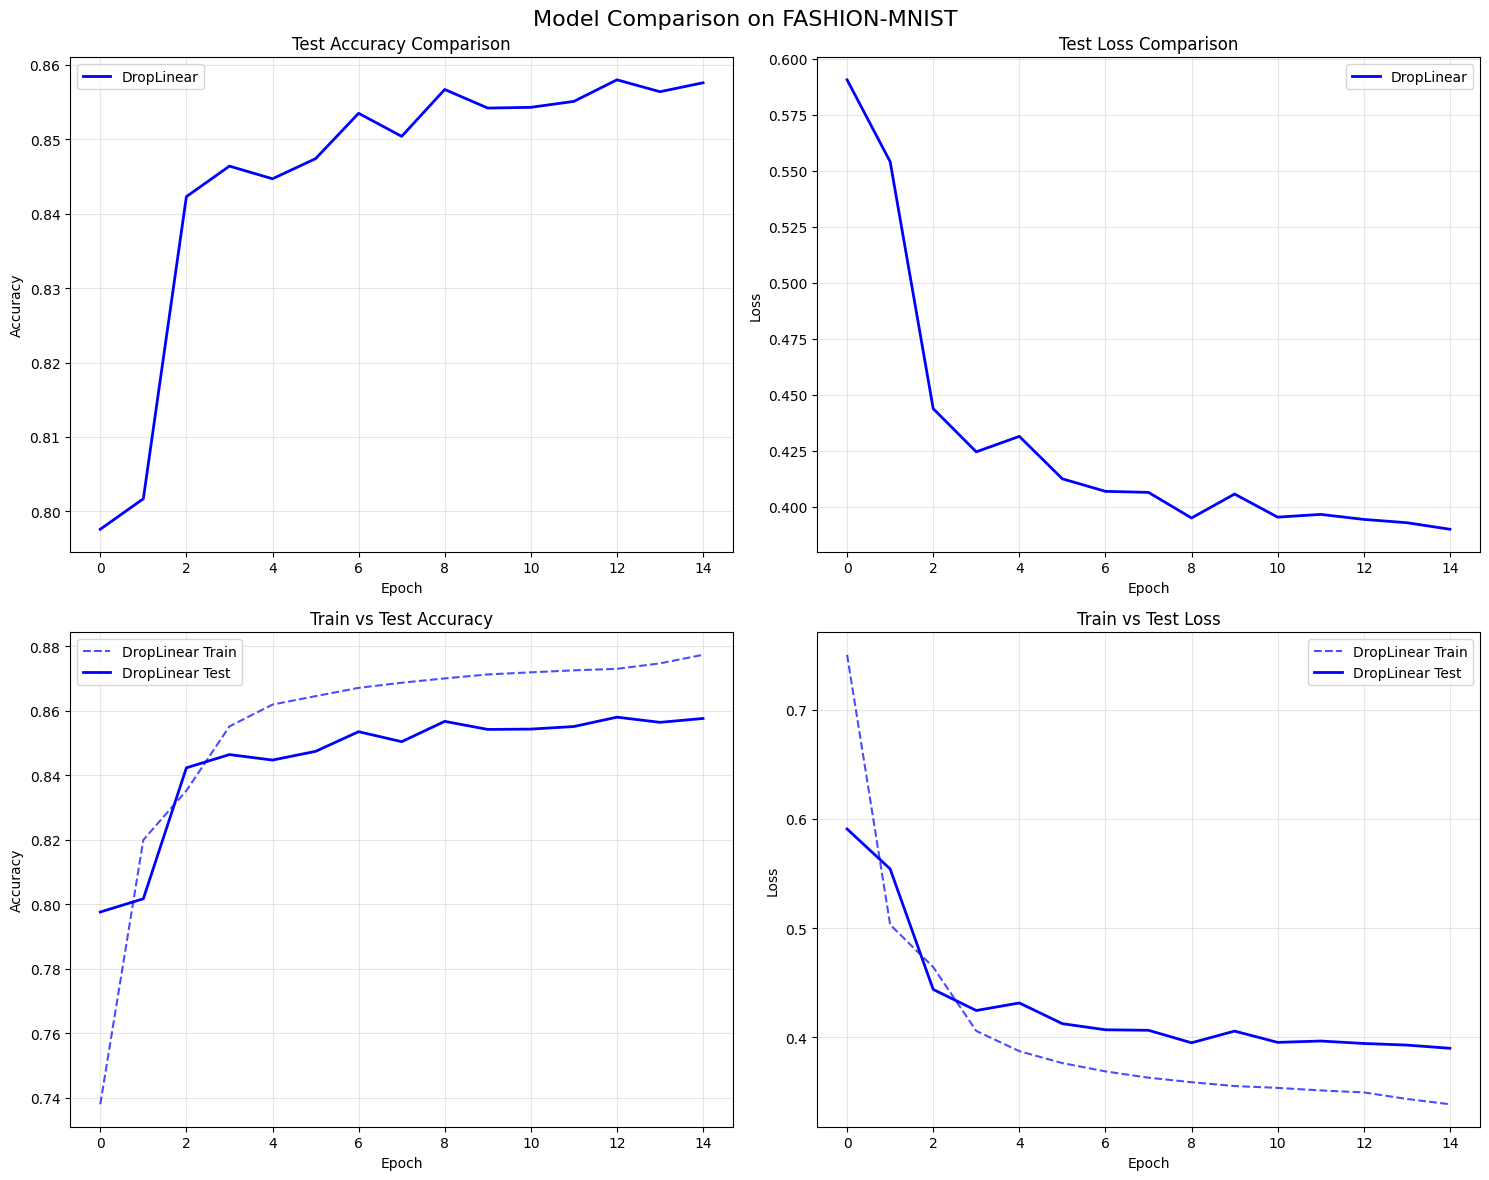


WEIGHT DISTRIBUTIONS (First Layer)


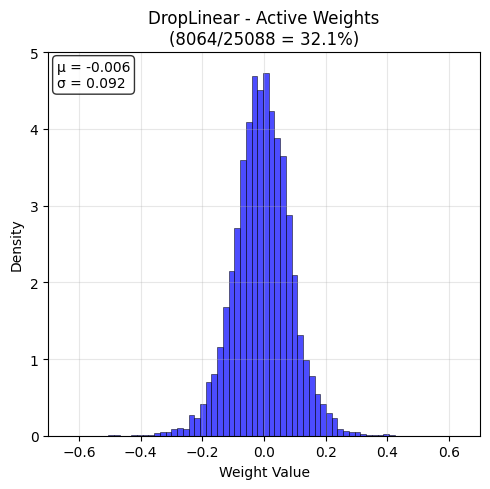


FINAL RESULTS COMPARISON
Model                Train Loss   Test Loss    Train Acc    Test Acc     Parameters  
--------------------------------------------------------------------------------
DropLinear           0.3386       0.3899       87.7       % 85.8       % 8,908       
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
DropLinear: 8,908 parameters
------------------------------------------------------------
tensor(8096, device='cuda:0')
25120


<Figure size 640x480 with 0 Axes>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 32
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 128
output_dim = 512
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=512,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=300,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
# optimiser_3 = optim.AdamW(model`_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    [model_1, optimiser_1, "DropLinear"],
    # [model_2, optimiser_2, "Linear"],
    # [model_3, optimiser_3, "ViT"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Creating models for FASHION-MNIST dataset...


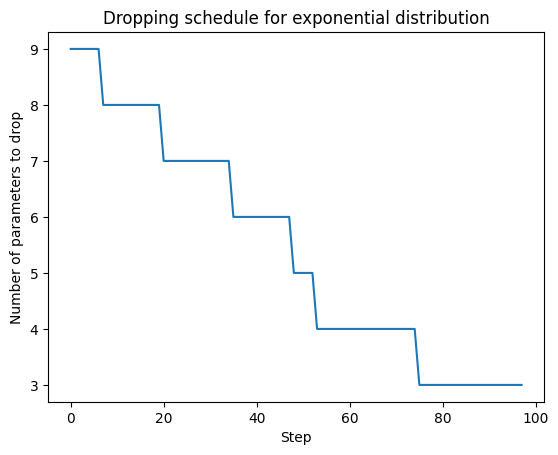

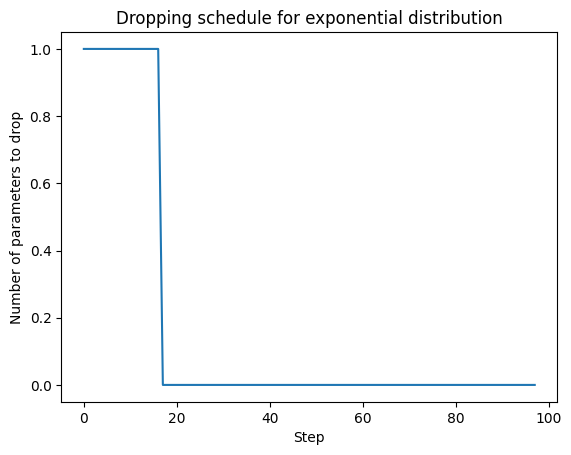

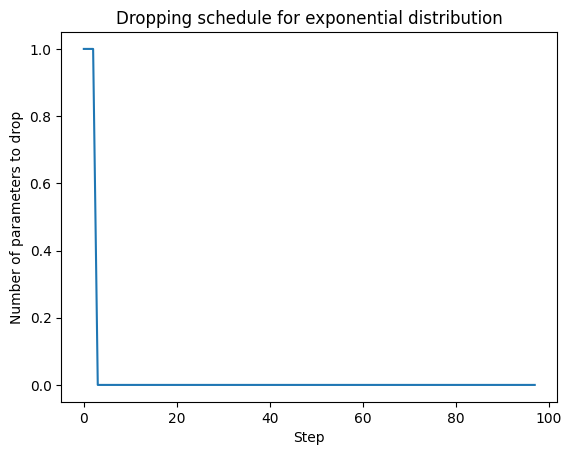

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
DropLinear: 26,506 parameters
------------------------------------------------------------

Training DropLinear model...


Training DropLinear:   7%|▋         | 234/3525 [00:01<00:15, 215.11it/s, Epoch=1/15, Batch=235/235, Loss=0.4827]

Epoch 1/15: Train Loss: 0.7502, Train Acc: 0.7380, Test Loss: 0.5907, Test Acc: 0.7976


Training DropLinear:  13%|█▎        | 469/3525 [00:02<00:14, 206.67it/s, Epoch=2/15, Batch=235/235, Loss=0.4309]

Epoch 2/15: Train Loss: 0.5030, Train Acc: 0.8199, Test Loss: 0.5541, Test Acc: 0.8017


Training DropLinear:  20%|█▉        | 704/3525 [00:04<00:14, 199.96it/s, Epoch=3/15, Batch=235/235, Loss=0.4234]

Epoch 3/15: Train Loss: 0.4642, Train Acc: 0.8352, Test Loss: 0.4437, Test Acc: 0.8423


Training DropLinear:  27%|██▋       | 939/3525 [00:06<00:12, 198.98it/s, Epoch=4/15, Batch=235/235, Loss=0.4378]

Epoch 4/15: Train Loss: 0.4058, Train Acc: 0.8551, Test Loss: 0.4245, Test Acc: 0.8464


Training DropLinear:  33%|███▎      | 1174/3525 [00:07<00:12, 195.81it/s, Epoch=5/15, Batch=235/235, Loss=0.4567]

Epoch 5/15: Train Loss: 0.3872, Train Acc: 0.8619, Test Loss: 0.4314, Test Acc: 0.8447


Training DropLinear:  40%|███▉      | 1409/3525 [00:09<00:10, 200.10it/s, Epoch=6/15, Batch=235/235, Loss=0.3975]

Epoch 6/15: Train Loss: 0.3763, Train Acc: 0.8645, Test Loss: 0.4124, Test Acc: 0.8474


Training DropLinear:  47%|████▋     | 1644/3525 [00:10<00:09, 204.26it/s, Epoch=7/15, Batch=235/235, Loss=0.4048]

Epoch 7/15: Train Loss: 0.3687, Train Acc: 0.8671, Test Loss: 0.4068, Test Acc: 0.8535


Training DropLinear:  53%|█████▎    | 1879/3525 [00:12<00:08, 205.37it/s, Epoch=8/15, Batch=235/235, Loss=0.4116]

Epoch 8/15: Train Loss: 0.3630, Train Acc: 0.8687, Test Loss: 0.4063, Test Acc: 0.8504


Training DropLinear:  60%|█████▉    | 2114/3525 [00:14<00:06, 202.97it/s, Epoch=9/15, Batch=235/235, Loss=0.3495]

Epoch 9/15: Train Loss: 0.3588, Train Acc: 0.8700, Test Loss: 0.3949, Test Acc: 0.8567


Training DropLinear:  67%|██████▋   | 2349/3525 [00:15<00:05, 203.72it/s, Epoch=10/15, Batch=235/235, Loss=0.3301]

Epoch 10/15: Train Loss: 0.3553, Train Acc: 0.8712, Test Loss: 0.4056, Test Acc: 0.8542


Training DropLinear:  73%|███████▎  | 2584/3525 [00:17<00:04, 198.41it/s, Epoch=11/15, Batch=235/235, Loss=0.3510]

Epoch 11/15: Train Loss: 0.3536, Train Acc: 0.8719, Test Loss: 0.3953, Test Acc: 0.8543


Training DropLinear:  80%|███████▉  | 2819/3525 [00:18<00:03, 195.92it/s, Epoch=12/15, Batch=235/235, Loss=0.2723]

Epoch 12/15: Train Loss: 0.3513, Train Acc: 0.8725, Test Loss: 0.3965, Test Acc: 0.8551


Training DropLinear:  87%|████████▋ | 3054/3525 [00:20<00:02, 201.63it/s, Epoch=13/15, Batch=235/235, Loss=0.3131]

Epoch 13/15: Train Loss: 0.3495, Train Acc: 0.8730, Test Loss: 0.3943, Test Acc: 0.8580


Training DropLinear:  93%|█████████▎| 3289/3525 [00:22<00:01, 199.86it/s, Epoch=14/15, Batch=235/235, Loss=0.2774]

Epoch 14/15: Train Loss: 0.3435, Train Acc: 0.8747, Test Loss: 0.3928, Test Acc: 0.8564


Training DropLinear: 100%|██████████| 3525/3525 [00:23<00:00, 147.24it/s, Epoch=15/15, Batch=235/235, Loss=0.2806]

Epoch 15/15: Train Loss: 0.3386, Train Acc: 0.8773, Test Loss: 0.3899, Test Acc: 0.8576
DropLinear Results:
  Final Train Loss: 0.3386
  Final Train Accuracy: 87.7%
  Final Test Loss: 0.3899
  Final Test Accuracy: 85.8%

CREATING COMPARATIVE PLOTS


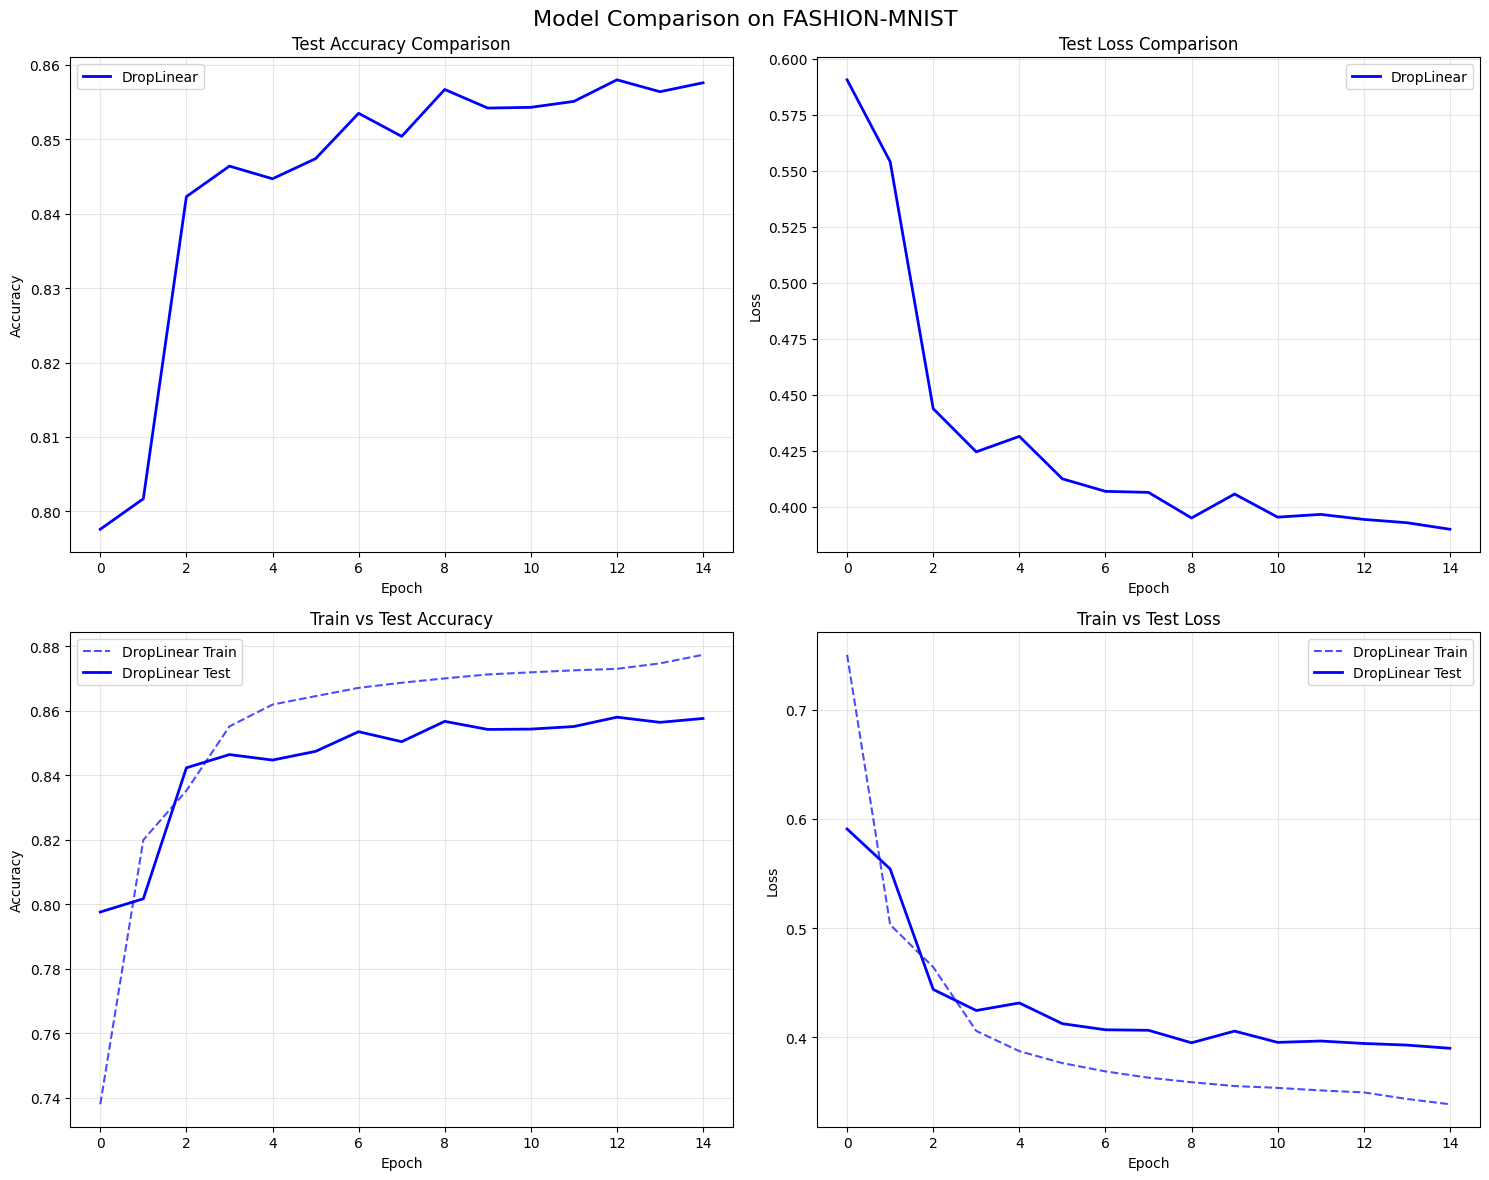


WEIGHT DISTRIBUTIONS (First Layer)


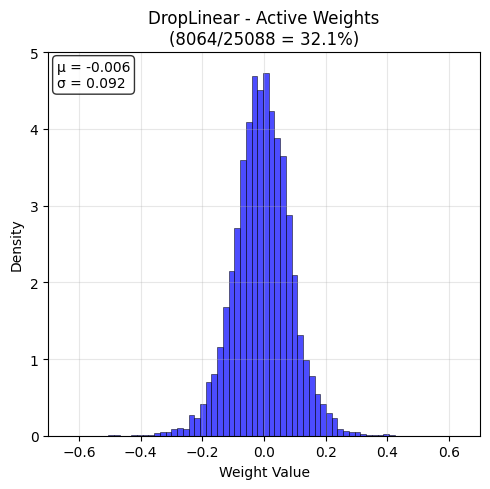


FINAL RESULTS COMPARISON
Model                Train Loss   Test Loss    Train Acc    Test Acc     Parameters  
--------------------------------------------------------------------------------
DropLinear           0.3386       0.3899       87.7       % 85.8       % 8,908       
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
DropLinear: 8,908 parameters
------------------------------------------------------------
tensor(8096, device='cuda:0')
25120


<Figure size 640x480 with 0 Axes>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 32
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 128
output_dim = 512
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=512,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=300,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
# optimiser_3 = optim.AdamW(model`_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    [model_1, optimiser_1, "DropLinear"],
    # [model_2, optimiser_2, "Linear"],
    # [model_3, optimiser_3, "ViT"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Restarted .venv (Python 3.12.9)

Creating models for FASHION-MNIST dataset...


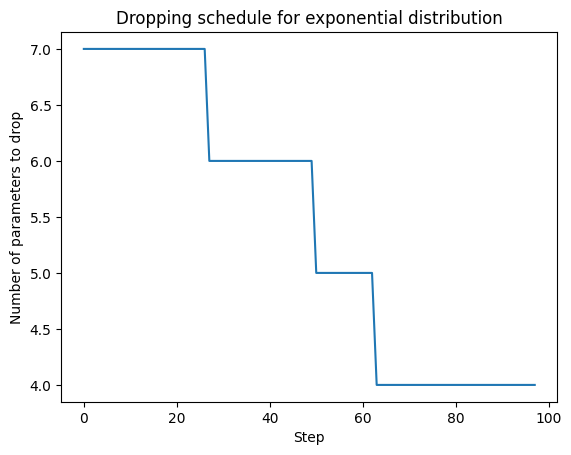

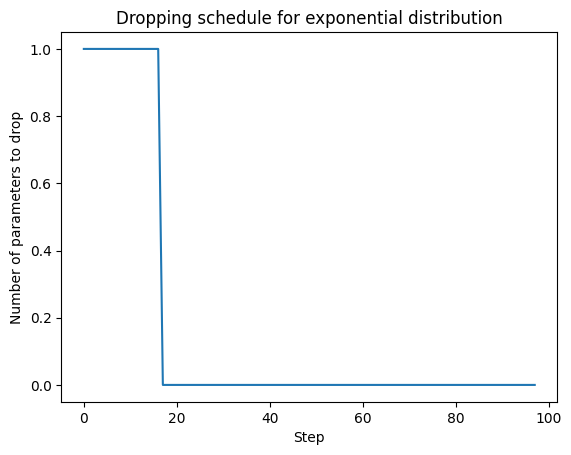

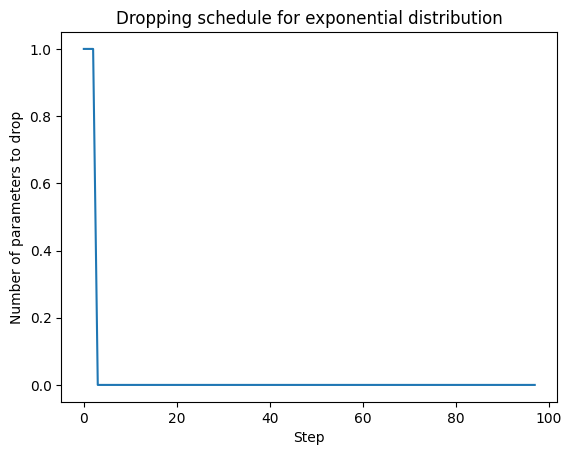

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
DropLinear: 26,506 parameters
------------------------------------------------------------

Training DropLinear model...


Training DropLinear:   7%|▋         | 234/3525 [00:01<00:16, 204.75it/s, Epoch=1/15, Batch=235/235, Loss=0.4789]

Epoch 1/15: Train Loss: 0.7503, Train Acc: 0.7382, Test Loss: 0.5892, Test Acc: 0.7963


Training DropLinear:  40%|███▉      | 1409/3525 [00:09<00:10, 202.24it/s, Epoch=6/15, Batch=235/235, Loss=0.3703]

Epoch 6/15: Train Loss: 0.3666, Train Acc: 0.8680, Test Loss: 0.4069, Test Acc: 0.8520


Training DropLinear:  73%|███████▎  | 2584/3525 [00:17<00:04, 207.39it/s, Epoch=11/15, Batch=235/235, Loss=0.3458]

Epoch 11/15: Train Loss: 0.3438, Train Acc: 0.8761, Test Loss: 0.3904, Test Acc: 0.8611


Training DropLinear: 100%|██████████| 3525/3525 [00:24<00:00, 145.54it/s, Epoch=15/15, Batch=235/235, Loss=0.2583]


DropLinear Results:
  Final Train Loss: 0.3312
  Final Train Accuracy: 87.8%
  Final Test Loss: 0.3819
  Final Test Accuracy: 86.0%

CREATING COMPARATIVE PLOTS


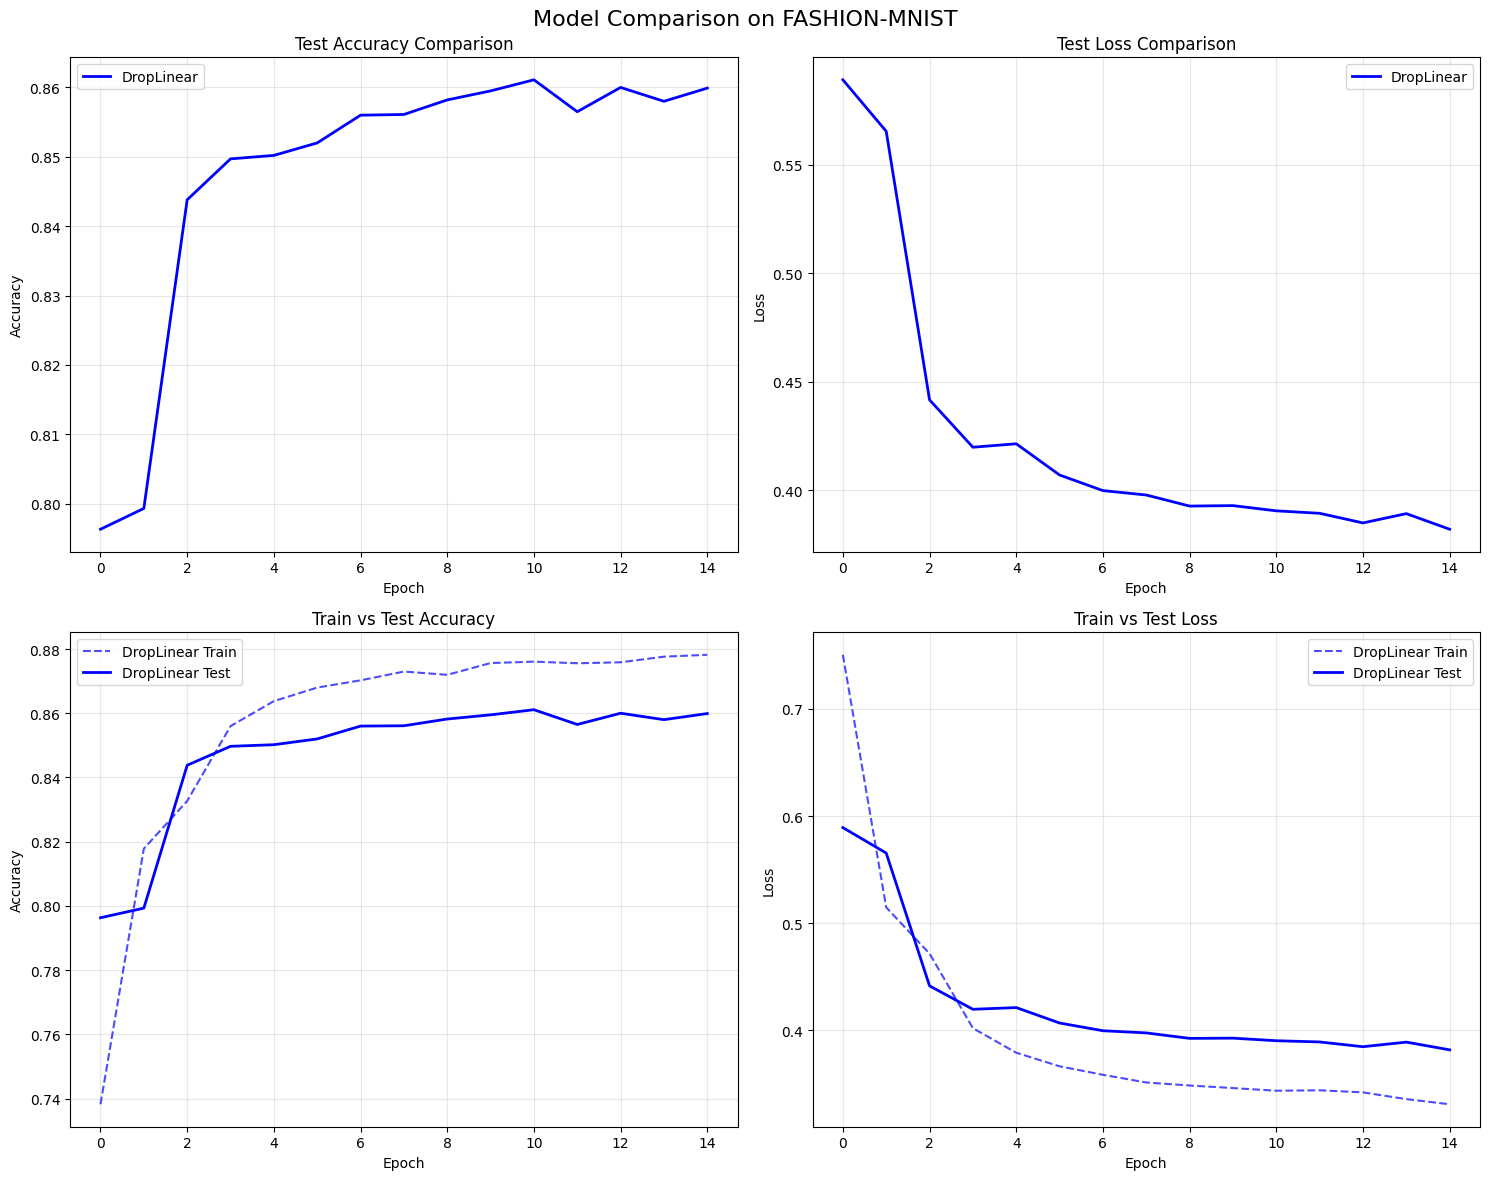


WEIGHT DISTRIBUTIONS (First Layer)


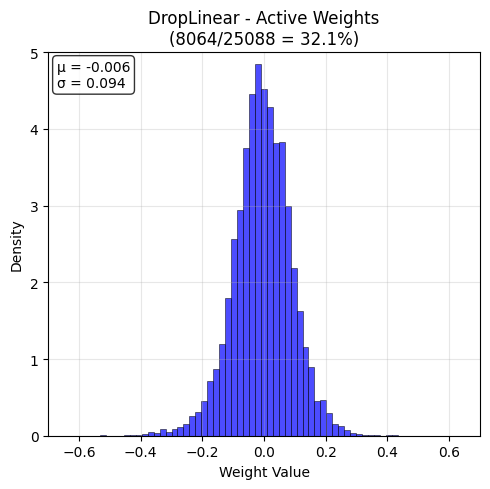


FINAL RESULTS COMPARISON
Model                Train Loss   Test Loss    Train Acc    Test Acc     Parameters  
--------------------------------------------------------------------------------
DropLinear           0.3312       0.3819       87.8       % 86.0       % 8,908       
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
DropLinear: 8,908 parameters
------------------------------------------------------------
tensor(8096, device='cuda:0')
25120


<Figure size 640x480 with 0 Axes>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 32
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 128
output_dim = 512
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=512,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=300,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
# optimiser_3 = optim.AdamW(model`_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    [model_1, optimiser_1, "DropLinear"],
    # [model_2, optimiser_2, "Linear"],
    # [model_3, optimiser_3, "ViT"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Creating models for FASHION-MNIST dataset...


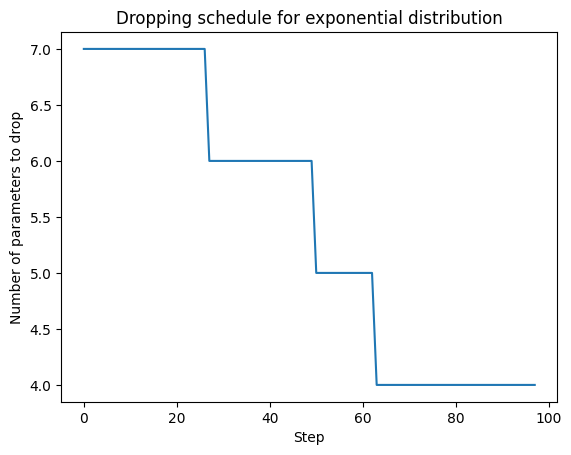

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
DropLinear: 26,506 parameters
------------------------------------------------------------

Training DropLinear model...


Training DropLinear:   7%|▋         | 234/3525 [00:01<00:15, 210.70it/s, Epoch=1/15, Batch=235/235, Loss=0.3530]

Epoch 1/15: Train Loss: 0.7106, Train Acc: 0.7500, Test Loss: 0.4818, Test Acc: 0.8320


Training DropLinear:  40%|███▉      | 1409/3525 [00:09<00:10, 201.40it/s, Epoch=6/15, Batch=235/235, Loss=0.3955]

Epoch 6/15: Train Loss: 0.3358, Train Acc: 0.8788, Test Loss: 0.3832, Test Acc: 0.8621


Training DropLinear:  73%|███████▎  | 2584/3525 [00:17<00:04, 207.34it/s, Epoch=11/15, Batch=235/235, Loss=0.2747]

Epoch 11/15: Train Loss: 0.3078, Train Acc: 0.8885, Test Loss: 0.3688, Test Acc: 0.8685


Training DropLinear: 100%|██████████| 3525/3525 [00:24<00:00, 146.02it/s, Epoch=15/15, Batch=235/235, Loss=0.2387]


DropLinear Results:
  Final Train Loss: 0.2902
  Final Train Accuracy: 89.3%
  Final Test Loss: 0.3563
  Final Test Accuracy: 87.2%

CREATING COMPARATIVE PLOTS


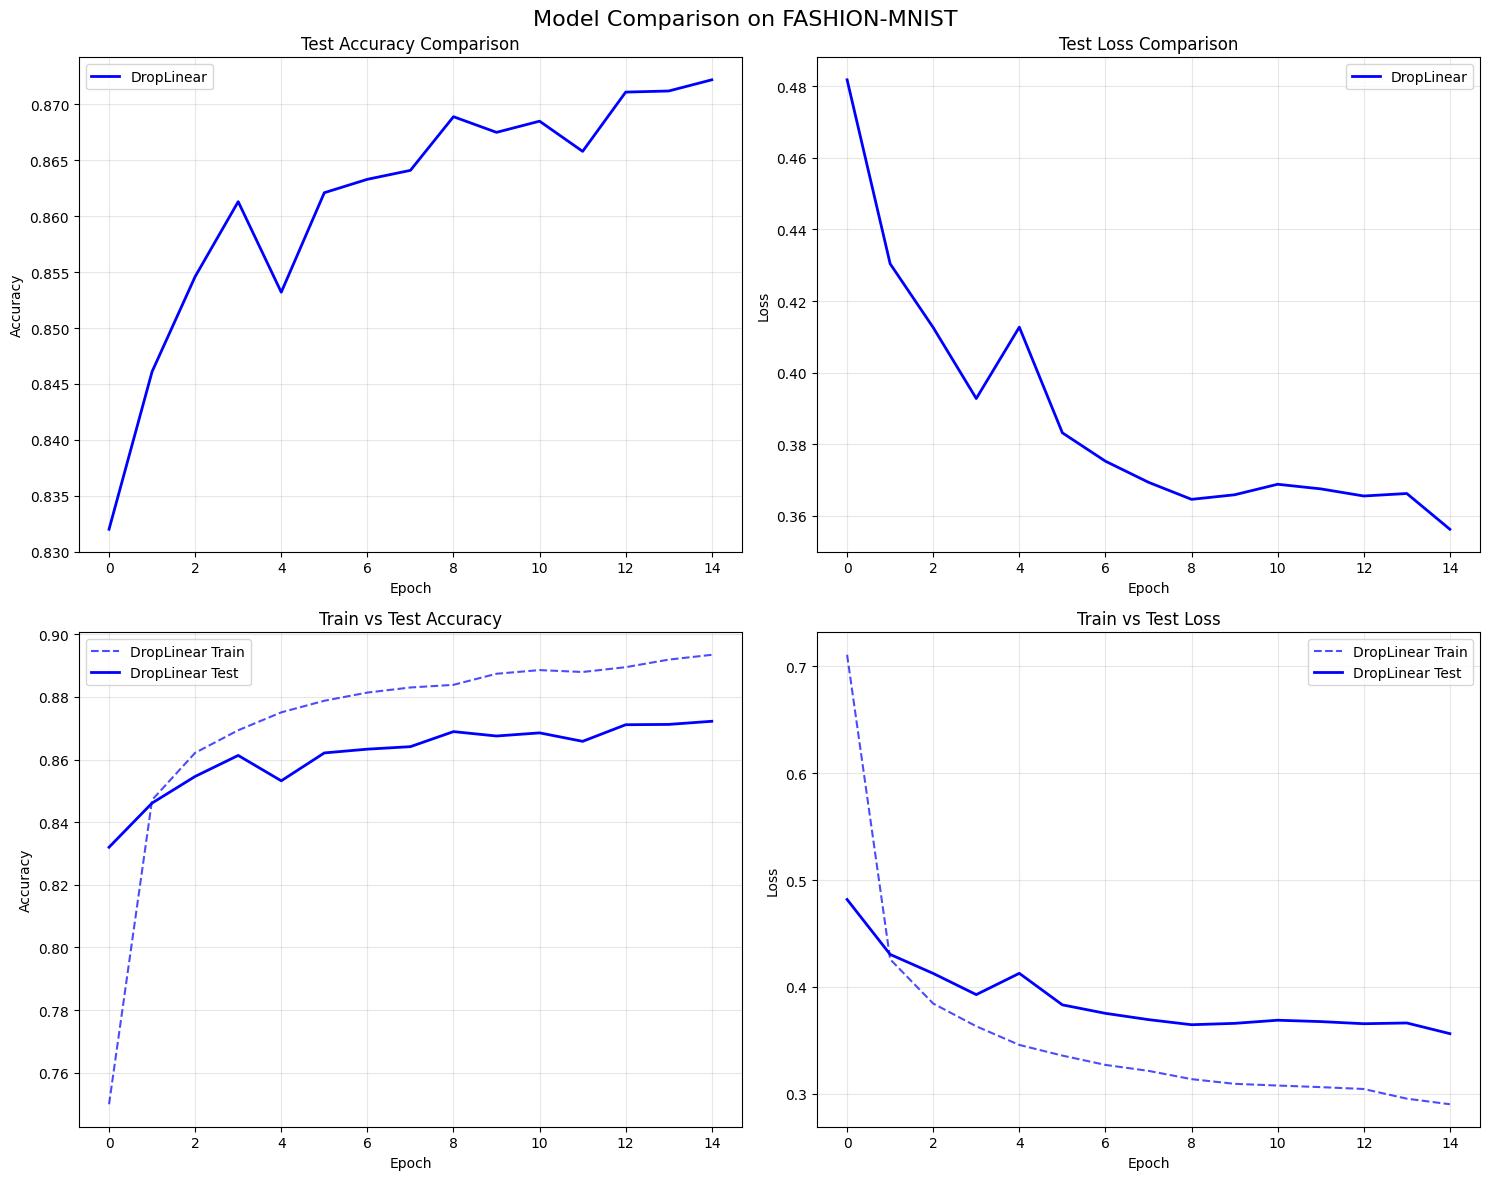


WEIGHT DISTRIBUTIONS (First Layer)


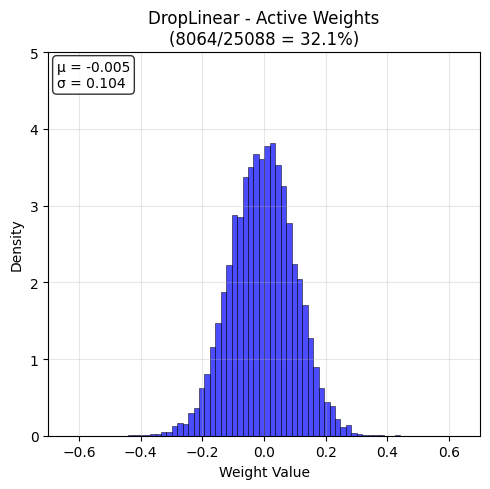


FINAL RESULTS COMPARISON
Model                Train Loss   Test Loss    Train Acc    Test Acc     Parameters  
--------------------------------------------------------------------------------
DropLinear           0.2902       0.3563       89.3       % 87.2       % 9,482       
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
DropLinear: 9,482 parameters
------------------------------------------------------------
tensor(8096, device='cuda:0')
25120


<Figure size 640x480 with 0 Axes>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 32
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 128
output_dim = 512
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
# optimiser_3 = optim.AdamW(model`_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    [model_1, optimiser_1, "DropLinear"],
    # [model_2, optimiser_2, "Linear"],
    # [model_3, optimiser_3, "ViT"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Creating models for FASHION-MNIST dataset...


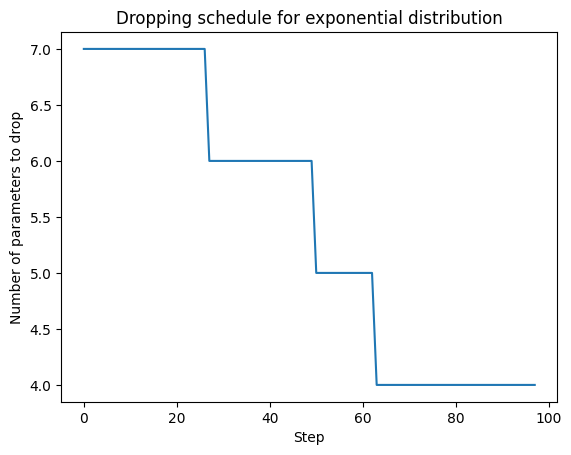

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 2 models for 15 epochs
------------------------------------------------------------
DropLinear: 26,506 parameters
Linear: 9,660 parameters
------------------------------------------------------------

Training DropLinear model...


Training DropLinear:   7%|▋         | 234/3525 [00:01<00:15, 209.63it/s, Epoch=1/15, Batch=235/235, Loss=0.3530]

Epoch 1/15: Train Loss: 0.7106, Train Acc: 0.7500, Test Loss: 0.4818, Test Acc: 0.8320


Training DropLinear:  40%|███▉      | 1409/3525 [00:09<00:10, 195.43it/s, Epoch=6/15, Batch=235/235, Loss=0.3955]

Epoch 6/15: Train Loss: 0.3358, Train Acc: 0.8788, Test Loss: 0.3832, Test Acc: 0.8621


Training DropLinear:  73%|███████▎  | 2584/3525 [00:16<00:04, 207.16it/s, Epoch=11/15, Batch=235/235, Loss=0.2747]

Epoch 11/15: Train Loss: 0.3078, Train Acc: 0.8885, Test Loss: 0.3688, Test Acc: 0.8685


Training DropLinear: 100%|██████████| 3525/3525 [00:23<00:00, 149.39it/s, Epoch=15/15, Batch=235/235, Loss=0.2387]


DropLinear Results:
  Final Train Loss: 0.2902
  Final Train Accuracy: 89.3%
  Final Test Loss: 0.3563
  Final Test Accuracy: 87.2%

Training Linear model...


Training Linear:   7%|▋         | 234/3525 [00:01<00:15, 214.89it/s, Epoch=1/15, Batch=235/235, Loss=0.5902]

Epoch 1/15: Train Loss: 1.0145, Train Acc: 0.6500, Test Loss: 0.5865, Test Acc: 0.7935


Training Linear:  40%|███▉      | 1409/3525 [00:09<00:10, 209.51it/s, Epoch=6/15, Batch=235/235, Loss=0.5603]

Epoch 6/15: Train Loss: 0.3982, Train Acc: 0.8589, Test Loss: 0.4263, Test Acc: 0.8464


Training Linear:  73%|███████▎  | 2584/3525 [00:16<00:04, 204.42it/s, Epoch=11/15, Batch=235/235, Loss=0.3772]

Epoch 11/15: Train Loss: 0.3596, Train Acc: 0.8722, Test Loss: 0.4035, Test Acc: 0.8546


Training Linear: 100%|██████████| 3525/3525 [00:23<00:00, 150.44it/s, Epoch=15/15, Batch=235/235, Loss=0.1778]


Linear Results:
  Final Train Loss: 0.3407
  Final Train Accuracy: 87.8%
  Final Test Loss: 0.3916
  Final Test Accuracy: 86.0%

CREATING COMPARATIVE PLOTS


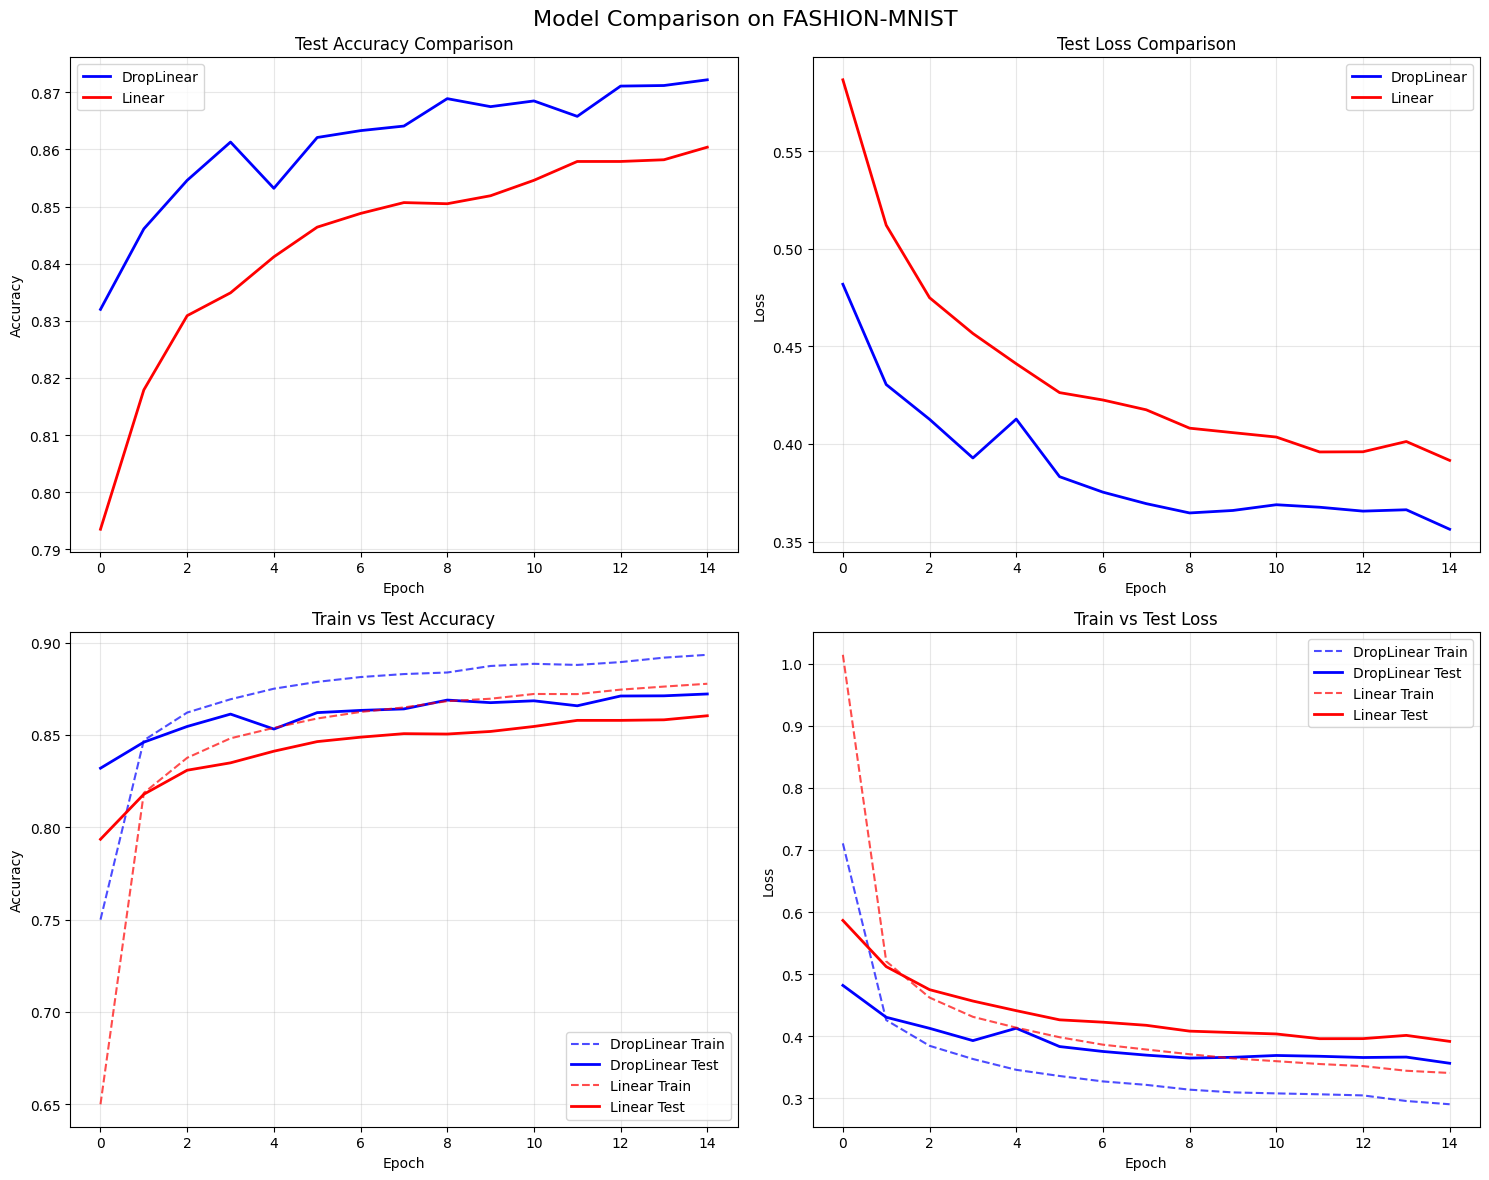


WEIGHT DISTRIBUTIONS (First Layer)


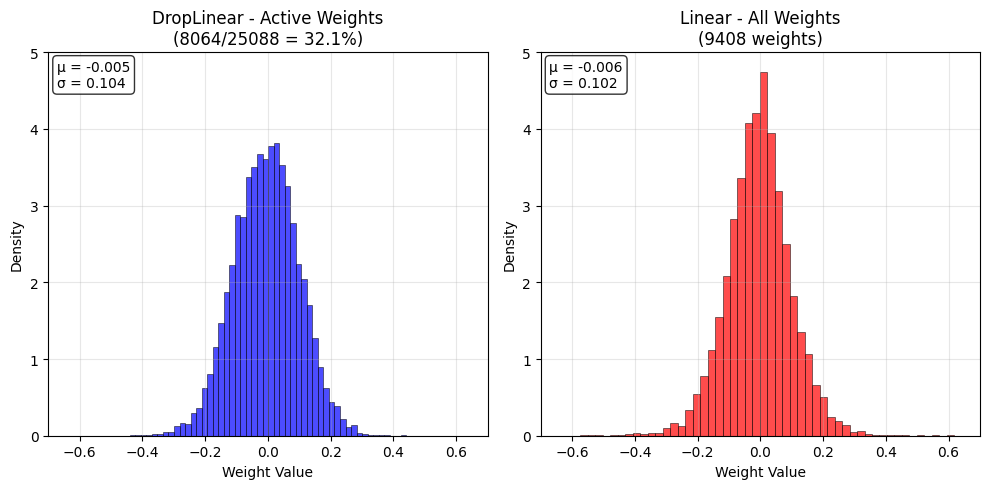


FINAL RESULTS COMPARISON
Model                Train Loss   Test Loss    Train Acc    Test Acc     Parameters  
--------------------------------------------------------------------------------
DropLinear           0.2902       0.3563       89.3       % 87.2       % 9,482       
Linear               0.3407       0.3916       87.8       % 86.0       % 9,660       
Dataset: FASHION-MNIST
Training 2 models for 15 epochs
------------------------------------------------------------
DropLinear: 9,482 parameters
Linear: 9,660 parameters
------------------------------------------------------------
tensor(8096, device='cuda:0')
25120


<Figure size 640x480 with 0 Axes>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 32
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 128
output_dim = 512
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
# optimiser_3 = optim.AdamW(model`_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    [model_1, optimiser_1, "DropLinear"],
    [model_2, optimiser_2, "Linear"],
    # [model_3, optimiser_3, "ViT"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Creating models for FASHION-MNIST dataset...


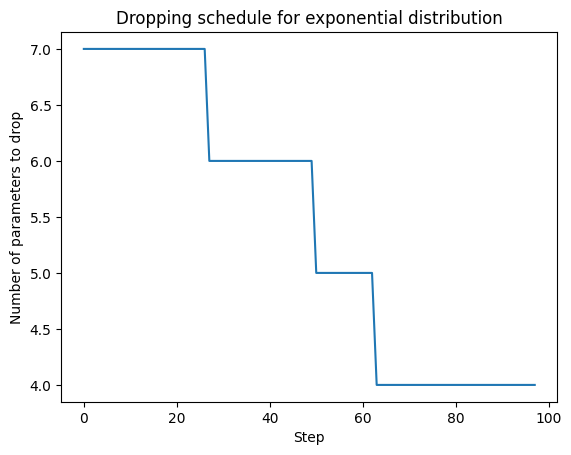

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
Active parameters: dendrite_W: 8192.0, dendrite_b: 128
Active parameters: dendrite_W: 8192.0, dendrite_b: 128
Dendritic: 17,930 parameters
------------------------------------------------------------

Training Dendritic model...


Training Dendritic:   7%|▋         | 234/3525 [00:01<00:16, 199.95it/s, Epoch=1/15, Batch=235/235, Loss=0.3624]

Epoch 1/15: Train Loss: 0.5381, Train Acc: 0.8107, Test Loss: 0.4282, Test Acc: 0.8436


Training Dendritic:  13%|█▎        | 470/3525 [00:03<00:20, 152.63it/s, Epoch=2/15, Batch=235/235, Loss=0.2135]


KeyboardInterrupt: 

Process Process-985:
Traceback (most recent call last):
  File "/home/luca/.local/share/uv/python/cpython-3.12.9-linux-x86_64-gnu/lib/python3.12/multiprocessing/process.py", line 317, in _bootstrap
    util._exit_function()
  File "/home/luca/.local/share/uv/python/cpython-3.12.9-linux-x86_64-gnu/lib/python3.12/multiprocessing/util.py", line 337, in _exit_function
    _run_finalizers(0)
  File "/home/luca/.local/share/uv/python/cpython-3.12.9-linux-x86_64-gnu/lib/python3.12/multiprocessing/util.py", line 303, in _run_finalizers
    finalizer()
  File "/home/luca/.local/share/uv/python/cpython-3.12.9-linux-x86_64-gnu/lib/python3.12/multiprocessing/util.py", line 227, in __call__
    res = self._callback(*self._args, **self._kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/luca/.local/share/uv/python/cpython-3.12.9-linux-x86_64-gnu/lib/python3.12/multiprocessing/queues.py", line 227, in _finalize_close
    with notempty:
         ^^^^^^^^
  File "/home/luca/.lo

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear, DendriticLayer
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 32
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 64
output_dim = 128
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

model_3 = nn.Sequential(
    DendriticLayer(
        in_dim=in_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
        percentage_resample=0.2,
        steps_to_resample=128,
    ),
    nn.LeakyReLU(),
    DendriticLayer(
        in_dim=output_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
    ),
    nn.LeakyReLU(),
    nn.Linear(output_dim, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
optimiser_3 = optim.AdamW(model_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    # [model_1, optimiser_1, "DropLinear"],
    # [model_2, optimiser_2, "Linear"],
    [model_3, optimiser_3, "Dendritic"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Creating models for FASHION-MNIST dataset...


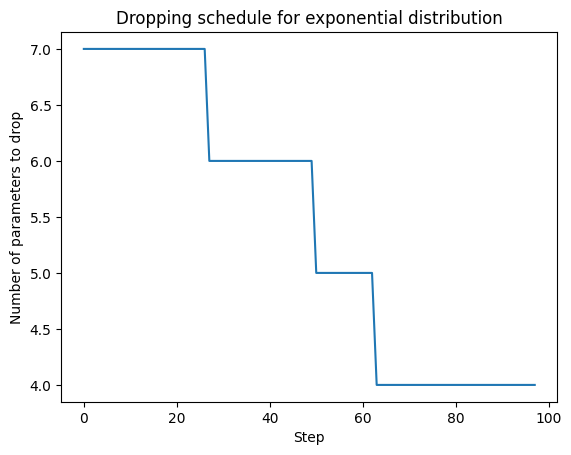

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
Active parameters: dendrite_W: 2048.0, dendrite_b: 128
Active parameters: dendrite_W: 512.0, dendrite_b: 32
Dendritic: 4,010 parameters
------------------------------------------------------------

Training Dendritic model...


Training Dendritic:   0%|          | 0/3525 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (256x32 and 128x10)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear, DendriticLayer
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 32
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 16
output_dim = 128
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

model_3 = nn.Sequential(
    DendriticLayer(
        in_dim=in_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
        percentage_resample=0.2,
        steps_to_resample=128,
    ),
    nn.LeakyReLU(),
    DendriticLayer(
        in_dim=output_dim,
        output_dim=32,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
    ),
    nn.LeakyReLU(),
    nn.Linear(output_dim, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
optimiser_3 = optim.AdamW(model_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    # [model_1, optimiser_1, "DropLinear"],
    # [model_2, optimiser_2, "Linear"],
    [model_3, optimiser_3, "Dendritic"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Creating models for FASHION-MNIST dataset...


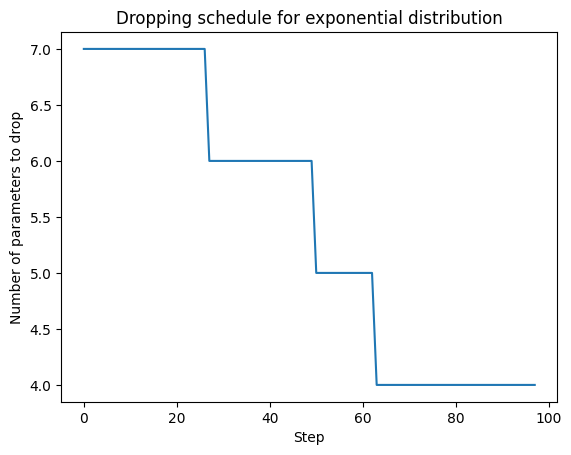

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
Active parameters: dendrite_W: 8192.0, dendrite_b: 128
Active parameters: dendrite_W: 2048.0, dendrite_b: 32
Dendritic: 10,730 parameters
------------------------------------------------------------

Training Dendritic model...


Training Dendritic:   7%|▋         | 234/3525 [00:01<00:16, 203.17it/s, Epoch=1/15, Batch=235/235, Loss=0.4995]

Epoch 1/15: Train Loss: 0.5672, Train Acc: 0.8020, Test Loss: 0.4631, Test Acc: 0.8276


Training Dendritic:  17%|█▋        | 609/3525 [00:03<00:19, 153.07it/s, Epoch=3/15, Batch=139/235, Loss=0.3540]


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear, DendriticLayer
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 32
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 64
output_dim = 128
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

model_3 = nn.Sequential(
    DendriticLayer(
        in_dim=in_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
        percentage_resample=0.2,
        steps_to_resample=128,
    ),
    nn.LeakyReLU(),
    DendriticLayer(
        in_dim=output_dim,
        output_dim=32,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
    ),
    nn.LeakyReLU(),
    nn.Linear(32, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
optimiser_3 = optim.AdamW(model_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    # [model_1, optimiser_1, "DropLinear"],
    # [model_2, optimiser_2, "Linear"],
    [model_3, optimiser_3, "Dendritic"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Creating models for FASHION-MNIST dataset...


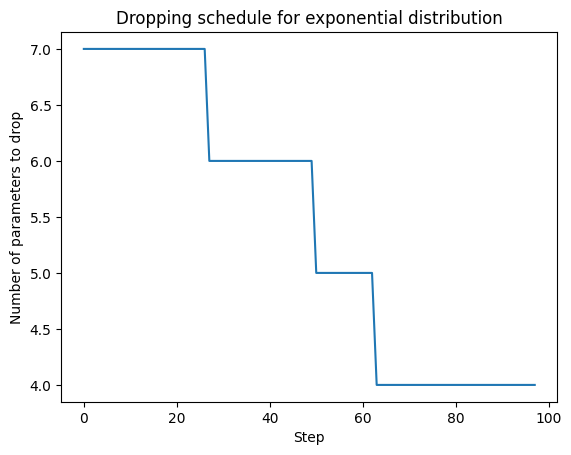

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Active parameters: dendrite_W: 1024.0, dendrite_b: 32
Dendritic: 5,610 parameters
------------------------------------------------------------

Training Dendritic model...


Training Dendritic:   7%|▋         | 234/3525 [00:01<00:16, 204.64it/s, Epoch=1/15, Batch=235/235, Loss=0.4898]

Epoch 1/15: Train Loss: 0.5876, Train Acc: 0.7926, Test Loss: 0.4691, Test Acc: 0.8250


Training Dendritic:  11%|█         | 387/3525 [00:02<00:20, 155.22it/s, Epoch=2/15, Batch=152/235, Loss=0.3475]


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear, DendriticLayer
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 32
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 32
output_dim = 128
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

model_3 = nn.Sequential(
    DendriticLayer(
        in_dim=in_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
        percentage_resample=0.2,
        steps_to_resample=128,
    ),
    nn.LeakyReLU(),
    DendriticLayer(
        in_dim=output_dim,
        output_dim=32,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
    ),
    nn.LeakyReLU(),
    nn.Linear(32, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
optimiser_3 = optim.AdamW(model_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    # [model_1, optimiser_1, "DropLinear"],
    # [model_2, optimiser_2, "Linear"],
    [model_3, optimiser_3, "Dendritic"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Creating models for FASHION-MNIST dataset...


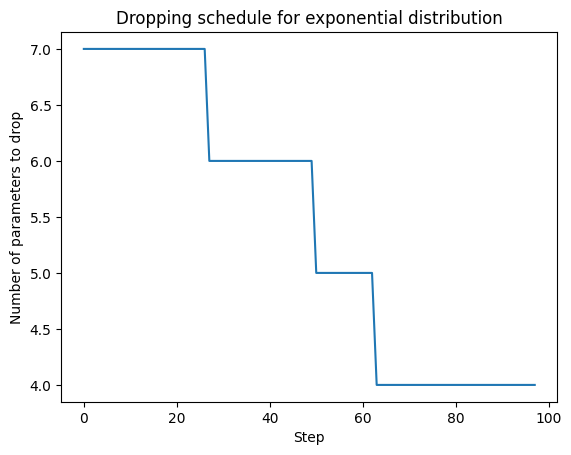

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 1 models for 15 epochs
------------------------------------------------------------
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Dendritic: 9,738 parameters
------------------------------------------------------------

Training Dendritic model...


Training Dendritic:   7%|▋         | 234/3525 [00:01<00:15, 210.05it/s, Epoch=1/15, Batch=235/235, Loss=0.3631]

Epoch 1/15: Train Loss: 0.5460, Train Acc: 0.8065, Test Loss: 0.4281, Test Acc: 0.8451


Training Dendritic:  20%|█▉        | 704/3525 [00:04<00:14, 199.33it/s, Epoch=3/15, Batch=235/235, Loss=0.2280]Exception ignored in: <function _releaseLock at 0x7f723fb11120>
Traceback (most recent call last):
  File "/home/luca/.local/share/uv/python/cpython-3.12.9-linux-x86_64-gnu/lib/python3.12/logging/__init__.py", line 243, in _releaseLock
    def _releaseLock():
    
KeyboardInterrupt: 
Training Dendritic:  20%|██        | 705/3525 [00:10<00:40, 69.50it/s, Epoch=3/15, Batch=235/235, Loss=0.2280] 


RuntimeError: DataLoader worker (pid(s) 85444) exited unexpectedly

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear, DendriticLayer
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 32
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 32
output_dim = 128
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

model_3 = nn.Sequential(
    DendriticLayer(
        in_dim=in_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
        percentage_resample=0.2,
        steps_to_resample=128,
    ),
    nn.LeakyReLU(),
    DendriticLayer(
        in_dim=output_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
    ),
    nn.LeakyReLU(),
    nn.Linear(output_dim, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
optimiser_3 = optim.AdamW(model_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    # [model_1, optimiser_1, "DropLinear"],
    # [model_2, optimiser_2, "Linear"],
    [model_3, optimiser_3, "Dendritic"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Creating models for FASHION-MNIST dataset...


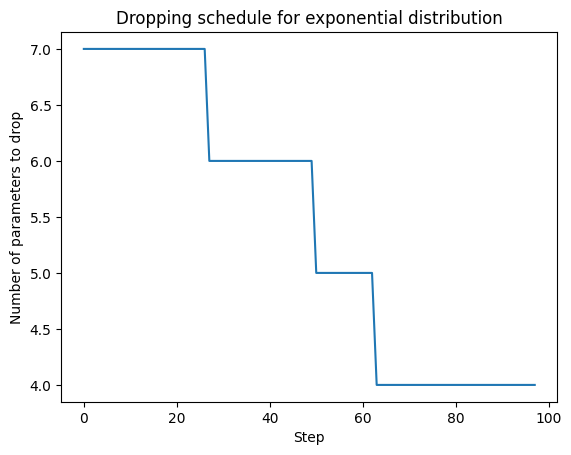

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 3 models for 15 epochs
------------------------------------------------------------
DropLinear: 26,506 parameters
Linear: 9,660 parameters
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Dendritic: 9,738 parameters
------------------------------------------------------------

Training DropLinear model...


Training DropLinear:   7%|▋         | 234/3525 [00:01<00:15, 207.16it/s, Epoch=1/15, Batch=235/235, Loss=0.4053]

Epoch 1/15: Train Loss: 0.7017, Train Acc: 0.7533, Test Loss: 0.4739, Test Acc: 0.8284


Training DropLinear:  27%|██▋       | 940/3525 [00:06<00:18, 143.55it/s, Epoch=4/15, Batch=235/235, Loss=0.3391]


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear, DendriticLayer
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 32
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 32
output_dim = 128
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

model_3 = nn.Sequential(
    DendriticLayer(
        in_dim=in_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
        percentage_resample=0.2,
        steps_to_resample=128,
    ),
    nn.LeakyReLU(),
    DendriticLayer(
        in_dim=output_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
    ),
    nn.LeakyReLU(),
    nn.Linear(output_dim, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
optimiser_3 = optim.AdamW(model_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    [model_1, optimiser_1, "DropLinear"],
    [model_2, optimiser_2, "Linear"],
    [model_3, optimiser_3, "Dendritic"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Creating models for FASHION-MNIST dataset...


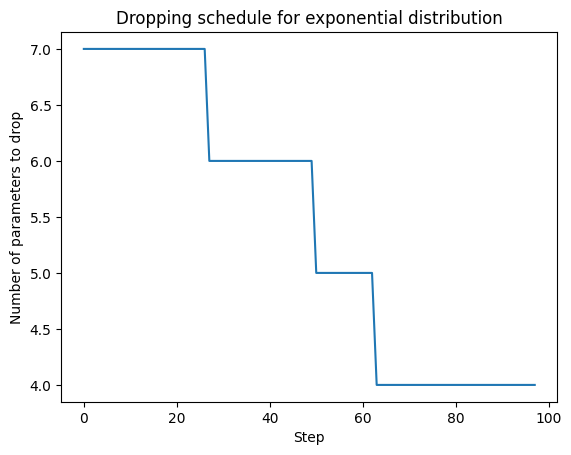

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 3 models for 15 epochs
------------------------------------------------------------
DropLinear: 26,506 parameters
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Dendritic: 9,738 parameters
Linear: 9,660 parameters
------------------------------------------------------------

Training DropLinear model...


Training DropLinear:   7%|▋         | 234/3525 [00:01<00:15, 205.83it/s, Epoch=1/15, Batch=235/235, Loss=0.4053]

Epoch 1/15: Train Loss: 0.7017, Train Acc: 0.7533, Test Loss: 0.4739, Test Acc: 0.8284


Training DropLinear:  40%|███▉      | 1409/3525 [00:09<00:10, 195.61it/s, Epoch=6/15, Batch=235/235, Loss=0.2336]

Epoch 6/15: Train Loss: 0.3344, Train Acc: 0.8784, Test Loss: 0.3874, Test Acc: 0.8571


Training DropLinear:  73%|███████▎  | 2584/3525 [00:17<00:04, 198.97it/s, Epoch=11/15, Batch=235/235, Loss=0.3877]

Epoch 11/15: Train Loss: 0.3111, Train Acc: 0.8856, Test Loss: 0.3792, Test Acc: 0.8619


Training DropLinear: 100%|██████████| 3525/3525 [00:24<00:00, 145.89it/s, Epoch=15/15, Batch=235/235, Loss=0.2563]


DropLinear Results:
  Final Train Loss: 0.2955
  Final Train Accuracy: 89.1%
  Final Test Loss: 0.3700
  Final Test Accuracy: 86.6%

Training Dendritic model...


Training Dendritic:   7%|▋         | 234/3525 [00:01<00:16, 201.04it/s, Epoch=1/15, Batch=235/235, Loss=0.3466]

Epoch 1/15: Train Loss: 0.5516, Train Acc: 0.8031, Test Loss: 0.4299, Test Acc: 0.8384


Training Dendritic:  40%|███▉      | 1409/3525 [00:09<00:10, 193.05it/s, Epoch=6/15, Batch=235/235, Loss=0.2149]

Epoch 6/15: Train Loss: 0.2734, Train Acc: 0.8983, Test Loss: 0.3402, Test Acc: 0.8770


Training Dendritic:  73%|███████▎  | 2584/3525 [00:17<00:04, 199.99it/s, Epoch=11/15, Batch=235/235, Loss=0.1836]

Epoch 11/15: Train Loss: 0.2194, Train Acc: 0.9184, Test Loss: 0.3292, Test Acc: 0.8817


Training Dendritic: 100%|██████████| 3525/3525 [00:24<00:00, 145.38it/s, Epoch=15/15, Batch=235/235, Loss=0.2384]


Dendritic Results:
  Final Train Loss: 0.1868
  Final Train Accuracy: 93.1%
  Final Test Loss: 0.3362
  Final Test Accuracy: 88.4%

Training Linear model...


Training Linear:   7%|▋         | 234/3525 [00:01<00:15, 209.45it/s, Epoch=1/15, Batch=235/235, Loss=0.5704]

Epoch 1/15: Train Loss: 1.0163, Train Acc: 0.6492, Test Loss: 0.5967, Test Acc: 0.7889


Training Linear:  40%|███▉      | 1409/3525 [00:09<00:10, 200.63it/s, Epoch=6/15, Batch=235/235, Loss=0.3186]

Epoch 6/15: Train Loss: 0.3976, Train Acc: 0.8593, Test Loss: 0.4285, Test Acc: 0.8462


Training Linear:  73%|███████▎  | 2585/3525 [00:17<00:04, 207.89it/s, Epoch=11/15, Batch=235/235, Loss=0.3163]

Epoch 11/15: Train Loss: 0.3592, Train Acc: 0.8724, Test Loss: 0.4006, Test Acc: 0.8533


Training Linear: 100%|██████████| 3525/3525 [00:24<00:00, 145.74it/s, Epoch=15/15, Batch=235/235, Loss=0.3553]


Linear Results:
  Final Train Loss: 0.3437
  Final Train Accuracy: 87.7%
  Final Test Loss: 0.3904
  Final Test Accuracy: 85.8%

CREATING COMPARATIVE PLOTS


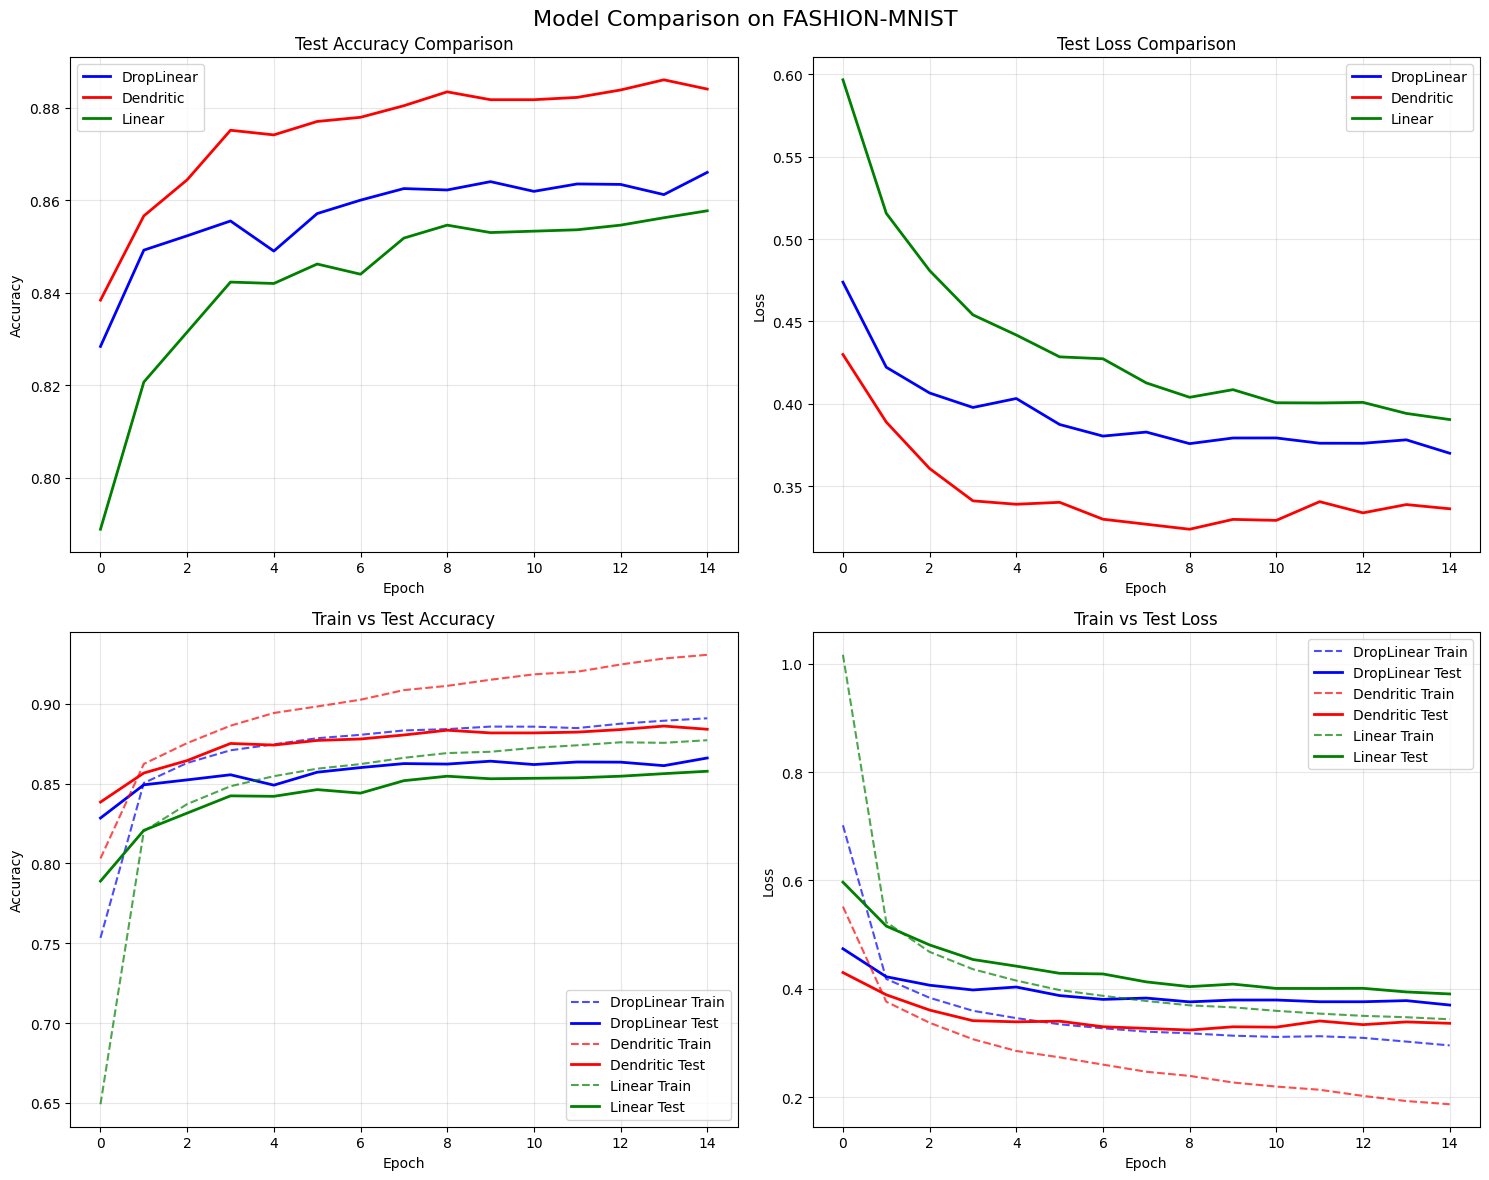


WEIGHT DISTRIBUTIONS (First Layer)


AttributeError: 'DendriticLayer' object has no attribute 'weight'

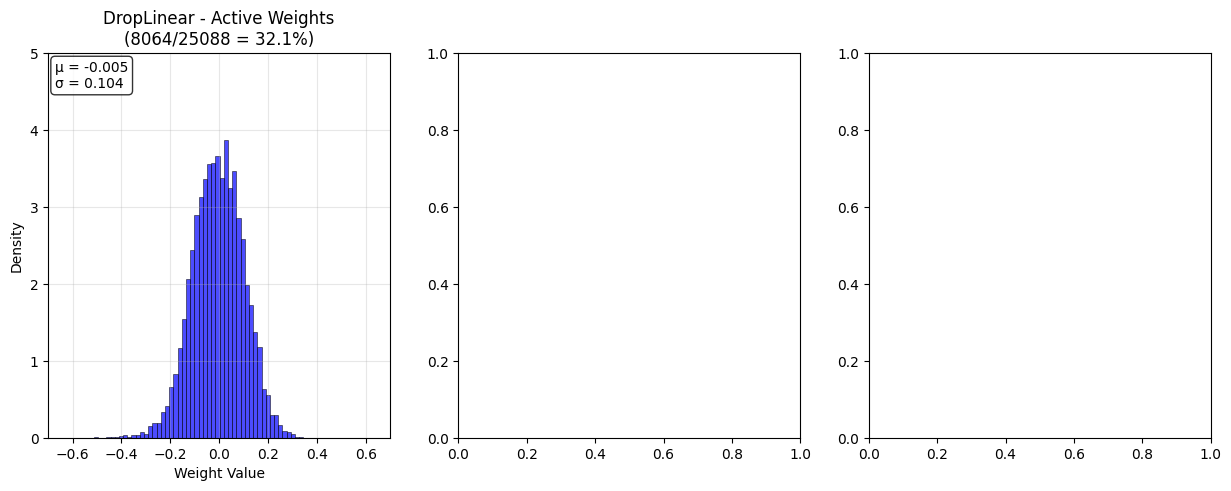

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear, DendriticLayer
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 32
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 32
output_dim = 128
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

model_3 = nn.Sequential(
    DendriticLayer(
        in_dim=in_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
        percentage_resample=0.2,
        steps_to_resample=128,
    ),
    nn.LeakyReLU(),
    DendriticLayer(
        in_dim=output_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
    ),
    nn.LeakyReLU(),
    nn.Linear(output_dim, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
optimiser_3 = optim.AdamW(model_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    [model_1, optimiser_1, "DropLinear"],
    [model_3, optimiser_3, "Dendritic"],
    [model_2, optimiser_2, "Linear"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Creating models for FASHION-MNIST dataset...


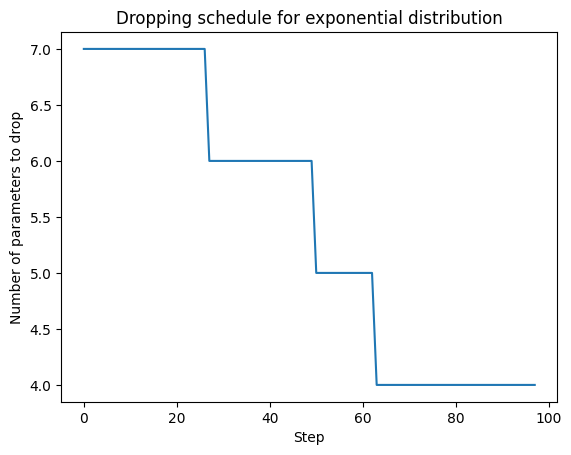

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 3 models for 15 epochs
------------------------------------------------------------
DropLinear: 26,506 parameters
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Dendritic: 9,738 parameters
Linear: 9,660 parameters
------------------------------------------------------------

Training DropLinear model...


Training DropLinear:   7%|▋         | 234/3525 [00:01<00:15, 212.84it/s, Epoch=1/15, Batch=235/235, Loss=0.4053]

Epoch 1/15: Train Loss: 0.7017, Train Acc: 0.7533, Test Loss: 0.4739, Test Acc: 0.8284


Training DropLinear:  40%|███▉      | 1409/3525 [00:09<00:10, 210.13it/s, Epoch=6/15, Batch=235/235, Loss=0.2336]

Epoch 6/15: Train Loss: 0.3344, Train Acc: 0.8784, Test Loss: 0.3874, Test Acc: 0.8571


Training DropLinear:  73%|███████▎  | 2584/3525 [00:17<00:04, 200.24it/s, Epoch=11/15, Batch=235/235, Loss=0.3877]

Epoch 11/15: Train Loss: 0.3111, Train Acc: 0.8856, Test Loss: 0.3792, Test Acc: 0.8619


Training DropLinear: 100%|██████████| 3525/3525 [00:23<00:00, 147.57it/s, Epoch=15/15, Batch=235/235, Loss=0.2563]


DropLinear Results:
  Final Train Loss: 0.2955
  Final Train Accuracy: 89.1%
  Final Test Loss: 0.3700
  Final Test Accuracy: 86.6%

Training Dendritic model...


Training Dendritic:   7%|▋         | 234/3525 [00:01<00:15, 215.96it/s, Epoch=1/15, Batch=235/235, Loss=0.3466]

Epoch 1/15: Train Loss: 0.5516, Train Acc: 0.8031, Test Loss: 0.4299, Test Acc: 0.8384


Training Dendritic:  40%|████      | 1410/3525 [00:09<00:09, 218.08it/s, Epoch=6/15, Batch=235/235, Loss=0.2149]

Epoch 6/15: Train Loss: 0.2734, Train Acc: 0.8983, Test Loss: 0.3402, Test Acc: 0.8770


Training Dendritic:  73%|███████▎  | 2584/3525 [00:17<00:04, 197.69it/s, Epoch=11/15, Batch=235/235, Loss=0.1836]

Epoch 11/15: Train Loss: 0.2194, Train Acc: 0.9184, Test Loss: 0.3292, Test Acc: 0.8817


Training Dendritic: 100%|██████████| 3525/3525 [00:24<00:00, 146.67it/s, Epoch=15/15, Batch=235/235, Loss=0.2384]


Dendritic Results:
  Final Train Loss: 0.1868
  Final Train Accuracy: 93.1%
  Final Test Loss: 0.3362
  Final Test Accuracy: 88.4%

Training Linear model...


Training Linear:   7%|▋         | 234/3525 [00:01<00:16, 201.08it/s, Epoch=1/15, Batch=235/235, Loss=0.5704]

Epoch 1/15: Train Loss: 1.0163, Train Acc: 0.6492, Test Loss: 0.5967, Test Acc: 0.7889


Training Linear:  40%|███▉      | 1409/3525 [00:09<00:10, 201.38it/s, Epoch=6/15, Batch=235/235, Loss=0.3186]

Epoch 6/15: Train Loss: 0.3976, Train Acc: 0.8593, Test Loss: 0.4285, Test Acc: 0.8462


Training Linear:  73%|███████▎  | 2584/3525 [00:17<00:04, 204.56it/s, Epoch=11/15, Batch=235/235, Loss=0.3163]

Epoch 11/15: Train Loss: 0.3592, Train Acc: 0.8724, Test Loss: 0.4006, Test Acc: 0.8533


Training Linear:  85%|████████▍ | 2985/3525 [00:20<00:03, 148.23it/s, Epoch=13/15, Batch=165/235, Loss=0.3425]


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear, DendriticLayer
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 32
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 32
output_dim = 128
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

model_3 = nn.Sequential(
    DendriticLayer(
        in_dim=in_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
        percentage_resample=0.2,
        steps_to_resample=128,
    ),
    nn.LeakyReLU(),
    DendriticLayer(
        in_dim=output_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
    ),
    nn.LeakyReLU(),
    nn.Linear(output_dim, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
optimiser_3 = optim.AdamW(model_3.parameters(), lr=0.001, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    [model_1, optimiser_1, "DropLinear"],
    [model_3, optimiser_3, "Dendritic"],
    [model_2, optimiser_2, "Linear"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Creating models for FASHION-MNIST dataset...


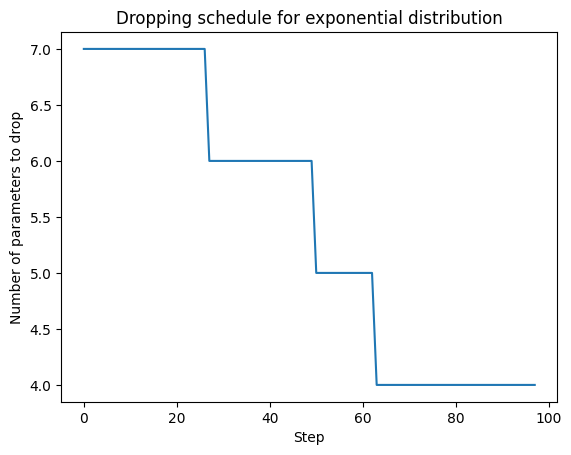

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 4 models for 15 epochs
------------------------------------------------------------
DropLinear: 26,506 parameters
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Dendritic: 9,738 parameters
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Dendritic w/ resampling: 9,738 parameters
Linear: 9,660 parameters
------------------------------------------------------------

Training DropLinear model...


Training DropLinear:   7%|▋         | 234/3525 [00:01<00:15, 213.65it/s, Epoch=1/15, Batch=235/235, Loss=0.4692]

Epoch 1/15: Train Loss: 0.7152, Train Acc: 0.7487, Test Loss: 0.4859, Test Acc: 0.8245


Training DropLinear:  40%|███▉      | 1409/3525 [00:09<00:10, 205.37it/s, Epoch=6/15, Batch=235/235, Loss=0.2944]

Epoch 6/15: Train Loss: 0.3350, Train Acc: 0.8774, Test Loss: 0.3812, Test Acc: 0.8611


Training DropLinear:  52%|█████▏    | 1819/3525 [00:12<00:09, 189.00it/s, Epoch=8/15, Batch=175/235, Loss=0.3837]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear, DendriticLayer
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 32
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 32
output_dim = 128
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

model_3 = nn.Sequential(
    DendriticLayer(
        in_dim=in_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
        percentage_resample=0.2,
        steps_to_resample=128,
    ),
    nn.LeakyReLU(),
    DendriticLayer(
        in_dim=output_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
    ),
    nn.LeakyReLU(),
    nn.Linear(output_dim, n_classes),
).to(device)

model_4 = nn.Sequential(
    DendriticLayer(
        in_dim=in_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=True,
        percentage_resample=0.2,
        steps_to_resample=128,
    ),
    nn.LeakyReLU(),
    DendriticLayer(
        in_dim=output_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
    ),
    nn.LeakyReLU(),
    nn.Linear(output_dim, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
optimiser_3 = optim.AdamW(model_3.parameters(), lr=0.001, weight_decay=0.001)
optimiser_4 = optim.AdamW(model_4.parameters(), lr=0.001, weight_decay=0.001)

criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    [model_1, optimiser_1, "DropLinear"],
    [model_3, optimiser_3, "Dendritic"],
    [model_4, optimiser_4, "Dendritic w/ resampling"],
    [model_2, optimiser_2, "Linear"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())

Restarted .venv (Python 3.12.9)

Creating models for FASHION-MNIST dataset...


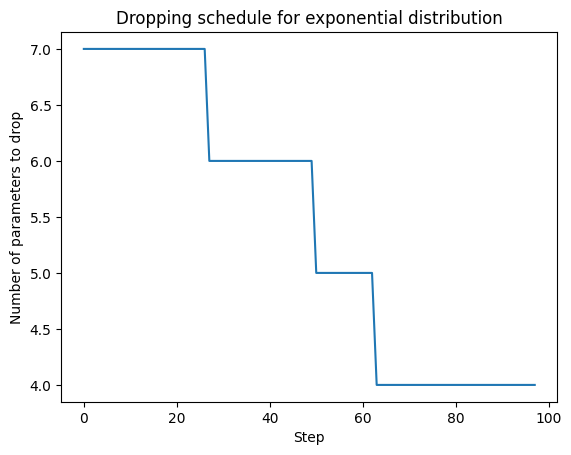

Sequential(
  (0): DropLinear()
  (1): LeakyReLU(negative_slope=0.01)
  (2): DropLinear()
  (3): LeakyReLU(negative_slope=0.01)
  (4): DropLinear()
)
Loading Fashion-MNIST dataset...
Dataset: FASHION-MNIST
Training 4 models for 15 epochs
------------------------------------------------------------
DropLinear: 26,506 parameters
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Dendritic: 9,738 parameters
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Dendritic w/ resampling: 9,738 parameters
Linear: 9,660 parameters
------------------------------------------------------------

Training DropLinear model...


Training DropLinear:   7%|▋         | 234/3525 [00:01<00:15, 211.43it/s, Epoch=1/15, Batch=235/235, Loss=0.4692]

Epoch 1/15: Train Loss: 0.7152, Train Acc: 0.7487, Test Loss: 0.4859, Test Acc: 0.8245


Training DropLinear:  40%|███▉      | 1409/3525 [00:09<00:10, 203.53it/s, Epoch=6/15, Batch=235/235, Loss=0.2944]

Epoch 6/15: Train Loss: 0.3350, Train Acc: 0.8774, Test Loss: 0.3812, Test Acc: 0.8611


Training DropLinear:  73%|███████▎  | 2584/3525 [00:17<00:04, 208.13it/s, Epoch=11/15, Batch=235/235, Loss=0.3775]

Epoch 11/15: Train Loss: 0.3106, Train Acc: 0.8863, Test Loss: 0.3718, Test Acc: 0.8661


Training DropLinear: 100%|██████████| 3525/3525 [00:23<00:00, 148.14it/s, Epoch=15/15, Batch=235/235, Loss=0.5537]


DropLinear Results:
  Final Train Loss: 0.2935
  Final Train Accuracy: 89.2%
  Final Test Loss: 0.3755
  Final Test Accuracy: 85.8%

Training Dendritic model...


Training Dendritic:   7%|▋         | 234/3525 [00:01<00:15, 216.67it/s, Epoch=1/15, Batch=235/235, Loss=0.3958]

Epoch 1/15: Train Loss: 0.5497, Train Acc: 0.8038, Test Loss: 0.4236, Test Acc: 0.8463


Training Dendritic:  40%|███▉      | 1409/3525 [00:09<00:10, 205.43it/s, Epoch=6/15, Batch=235/235, Loss=0.2645]

Epoch 6/15: Train Loss: 0.2734, Train Acc: 0.8977, Test Loss: 0.3373, Test Acc: 0.8753


Training Dendritic:  73%|███████▎  | 2584/3525 [00:17<00:04, 198.84it/s, Epoch=11/15, Batch=235/235, Loss=0.2166]

Epoch 11/15: Train Loss: 0.2183, Train Acc: 0.9187, Test Loss: 0.3265, Test Acc: 0.8858


Training Dendritic: 100%|██████████| 3525/3525 [00:23<00:00, 148.45it/s, Epoch=15/15, Batch=235/235, Loss=0.2879]


Dendritic Results:
  Final Train Loss: 0.1856
  Final Train Accuracy: 93.1%
  Final Test Loss: 0.3415
  Final Test Accuracy: 88.5%

Training Dendritic w/ resampling model...


Training Dendritic w/ resampling:   0%|          | 0/3525 [00:00<?, ?it/s]/home/luca/Coding/projects/dendritic-computation/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1842: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)
Training Dendritic w/ resampling:   7%|▋         | 234/3525 [00:01<00:16, 202.79it/s, Epoch=1/15, Batch=235/235, Loss=0.3771]

Epoch 1/15: Train Loss: 0.6107, Train Acc: 0.7842, Test Loss: 0.4721, Test Acc: 0.8245


Training Dendritic w/ resampling:  40%|███▉      | 1409/3525 [00:09<00:10, 199.76it/s, Epoch=6/15, Batch=235/235, Loss=0.5050]

Epoch 6/15: Train Loss: 0.4093, Train Acc: 0.8505, Test Loss: 0.4974, Test Acc: 0.8272


Training Dendritic w/ resampling:  73%|███████▎  | 2584/3525 [00:17<00:04, 209.60it/s, Epoch=11/15, Batch=235/235, Loss=0.3385]

Epoch 11/15: Train Loss: 0.3649, Train Acc: 0.8654, Test Loss: 0.4186, Test Acc: 0.8448


Training Dendritic w/ resampling: 100%|██████████| 3525/3525 [00:24<00:00, 144.97it/s, Epoch=15/15, Batch=235/235, Loss=0.3150]


Dendritic w/ resampling Results:
  Final Train Loss: 0.3413
  Final Train Accuracy: 87.2%
  Final Test Loss: 0.3822
  Final Test Accuracy: 86.0%

Training Linear model...


Training Linear:   7%|▋         | 234/3525 [00:01<00:15, 218.38it/s, Epoch=1/15, Batch=235/235, Loss=0.6919]

Epoch 1/15: Train Loss: 1.0121, Train Acc: 0.6533, Test Loss: 0.5852, Test Acc: 0.7971


Training Linear:  40%|███▉      | 1409/3525 [00:09<00:10, 203.65it/s, Epoch=6/15, Batch=235/235, Loss=0.2868]

Epoch 6/15: Train Loss: 0.3982, Train Acc: 0.8592, Test Loss: 0.4267, Test Acc: 0.8484


Training Linear:  73%|███████▎  | 2584/3525 [00:17<00:04, 201.17it/s, Epoch=11/15, Batch=235/235, Loss=0.3452]

Epoch 11/15: Train Loss: 0.3607, Train Acc: 0.8722, Test Loss: 0.4007, Test Acc: 0.8550


Training Linear: 100%|██████████| 3525/3525 [00:24<00:00, 146.38it/s, Epoch=15/15, Batch=235/235, Loss=0.3790]


Linear Results:
  Final Train Loss: 0.3433
  Final Train Accuracy: 87.7%
  Final Test Loss: 0.3903
  Final Test Accuracy: 86.0%

CREATING COMPARATIVE PLOTS


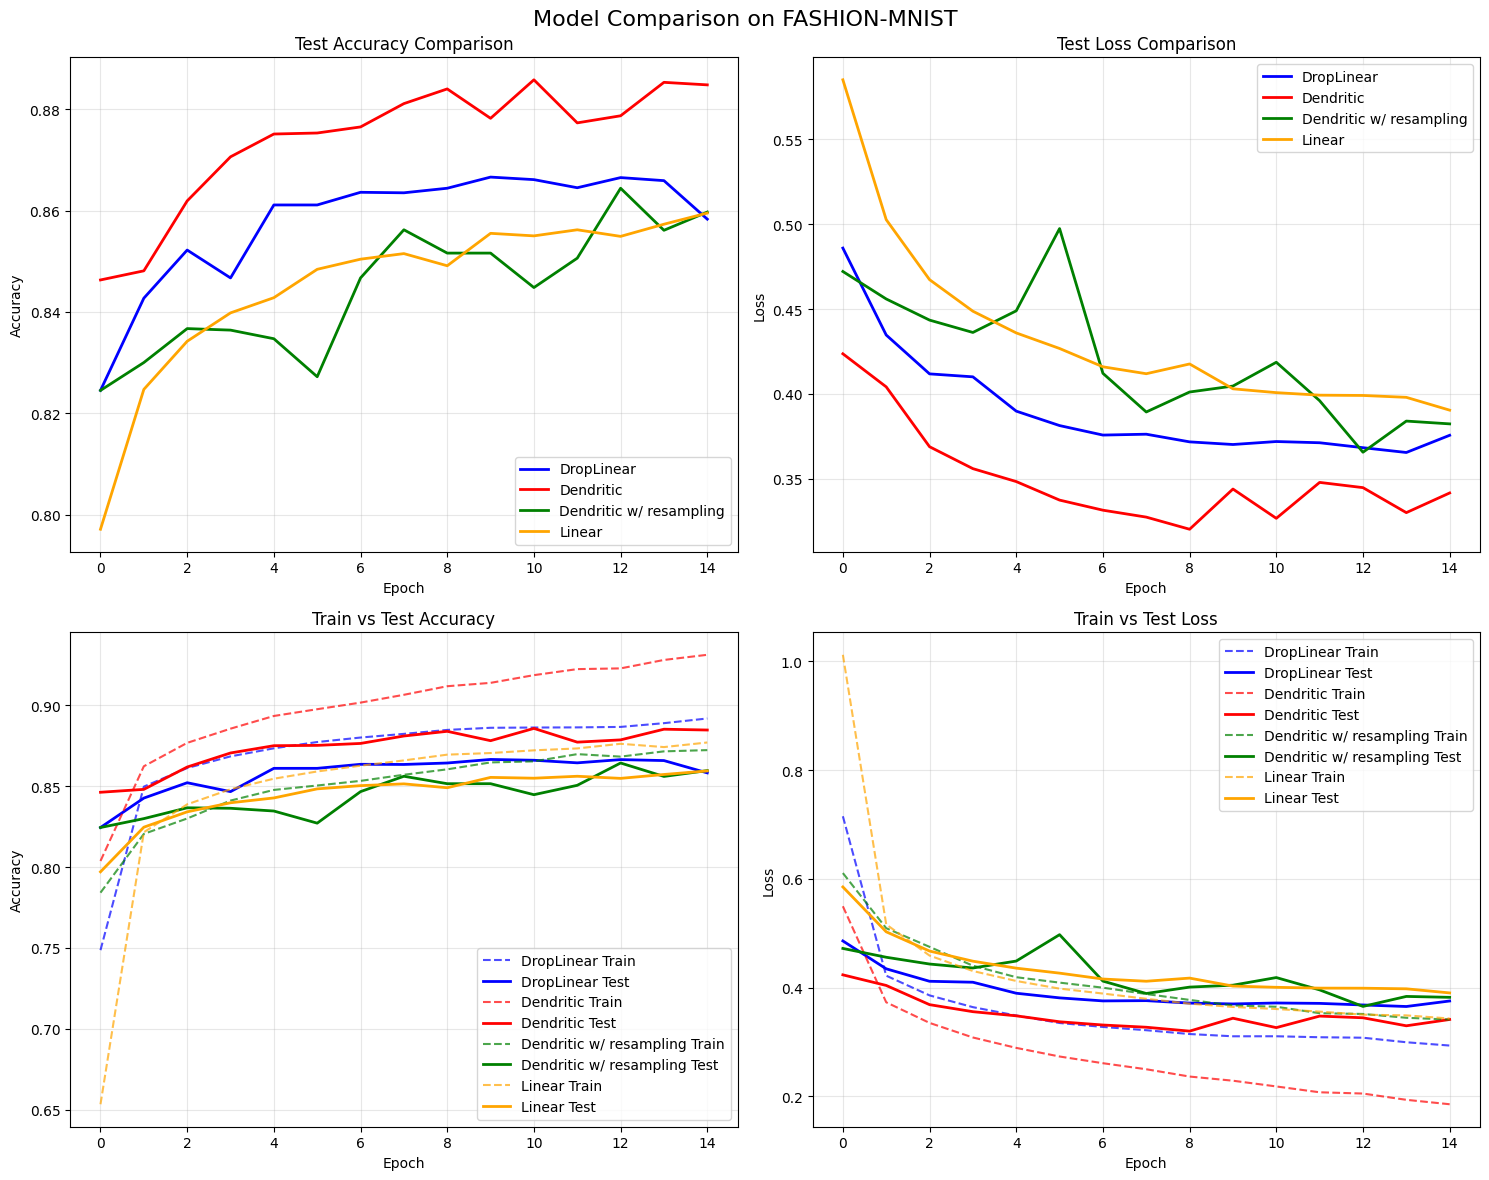


FINAL RESULTS COMPARISON
Model                Train Loss   Test Loss    Train Acc    Test Acc     Parameters  
--------------------------------------------------------------------------------
DropLinear           0.2935       0.3755       89.2       % 85.8       % 9,482       
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Dendritic            0.1856       0.3415       93.1       % 88.5       % 9,738       
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Dendritic w/ resampling 0.3413       0.3822       87.2       % 86.0       % 9,738       
Linear               0.3433       0.3903       87.7       % 86.0       % 9,660       
Final number of parameters:
Training 4 models for 15 epochs
------------------------------------------------------------
DropLinear: 9,482 parameters
Active parameters: dendrite_W: 4096.0, dendrite_b: 128
Active parameters: dendrite_W: 4096

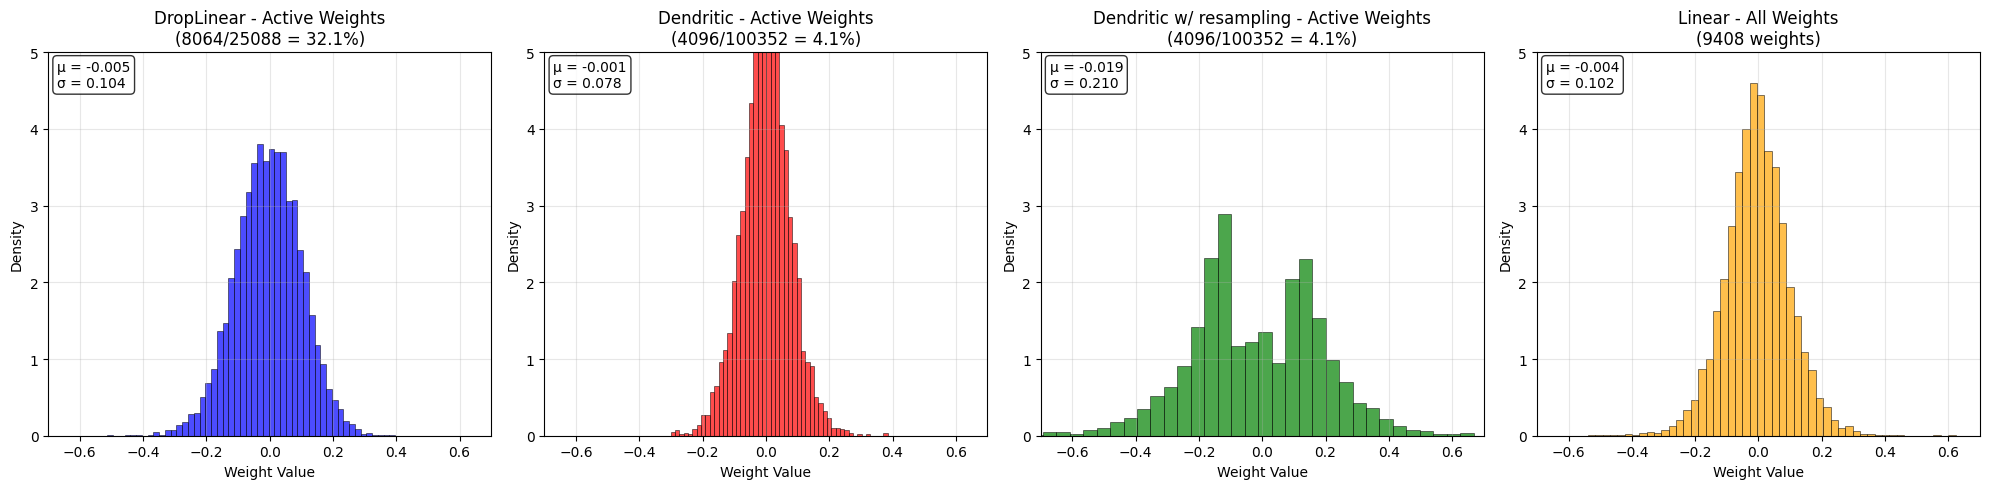

tensor(8096, device='cuda:0')
25120


<Figure size 640x480 with 0 Axes>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from t_modules import DropLinear, DendriticLayer
from t_training import train_models_comparative

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configuration
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", or "cifar10"
n_epochs = 15
batch_size = 256
n_classes = 10

# Get dataset-specific parameters
if dataset == "mnist" or dataset == "fashion-mnist":
    img_size = 28
    in_dim = 28 * 28
    in_channels = 1
    n_samples = 60000
elif dataset == "cifar10":
    img_size = 32
    in_dim = 32 * 32 * 3
    in_channels = 3
    n_samples = 60000

# drop linear model config
hidden_dim = 32
drop_distribution = "exponential"
steps_to_resample = 32
undo_last_mask = False

training_steps = n_samples // batch_size * n_epochs

# Dendritic model config
n_dendrite_inputs = 32
output_dim = 128
# ViT config
patch_size = 4  # 8x8 patches for 32x32 images

embed_dim = 192
depth = 4
n_heads = 8

print(f"Creating models for {dataset.upper()} dataset...")


# 1. Dendritic Neural Network (Simplified)
model_1 = nn.Sequential(
    DropLinear(
        in_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=8096,
        training_steps=training_steps,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        hidden_dim,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
        drop=False,
    ),
    nn.LeakyReLU(),
    DropLinear(
        hidden_dim,
        n_classes,
        drop_distribution=drop_distribution,
        steps_to_resample=steps_to_resample,
        target_params=10000,
        training_steps=training_steps,
        drop=False,
    ),
).to(device)

model_2 = nn.Sequential(
    nn.Linear(in_dim, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 10),
    nn.LeakyReLU(),
    nn.Linear(10, n_classes),
).to(device)

model_3 = nn.Sequential(
    DendriticLayer(
        in_dim=in_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
        percentage_resample=0.2,
        steps_to_resample=128,
    ),
    nn.LeakyReLU(),
    DendriticLayer(
        in_dim=output_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
    ),
    nn.LeakyReLU(),
    nn.Linear(output_dim, n_classes),
).to(device)

model_4 = nn.Sequential(
    DendriticLayer(
        in_dim=in_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=True,
        percentage_resample=0.2,
        steps_to_resample=128,
    ),
    nn.LeakyReLU(),
    DendriticLayer(
        in_dim=output_dim,
        output_dim=output_dim,
        n_dendrite_inputs=n_dendrite_inputs,
        synaptic_resampling=False,
    ),
    nn.LeakyReLU(),
    nn.Linear(output_dim, n_classes),
).to(device)

print(model_1)


optimiser_1 = optim.AdamW(model_1.parameters(), lr=0.001, weight_decay=0.001)
optimiser_2 = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=0.001)
optimiser_3 = optim.AdamW(model_3.parameters(), lr=0.001, weight_decay=0.001)
optimiser_4 = optim.AdamW(model_4.parameters(), lr=0.001, weight_decay=0.001)

criterion = nn.CrossEntropyLoss()

# Configure models for comparative training
models_config = [
    [model_1, optimiser_1, "DropLinear"],
    [model_3, optimiser_3, "Dendritic"],
    [model_4, optimiser_4, "Dendritic w/ resampling"],
    [model_2, optimiser_2, "Linear"],
]

# Use the new comparative training function
results = train_models_comparative(
    models_config=models_config,
    dataset=dataset,
    criterion=criterion,
    n_epochs=n_epochs,
    batch_size=batch_size,
    verbose=True,
)

print(model_1[0].num_active_params())

print(model_1[0].num_params())